# Customer Churn Analysis

# A. Logistic Regression

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

from sklearn import model_selection
from sklearn import preprocessing

from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('g:/data/churn_train.csv')

In [3]:
df.shape

(3333, 21)

In [4]:
df.isna().sum()

st            0
acclen        0
arcode        0
phnum         0
intplan       0
voice         0
nummailmes    0
tdmin         0
tdcal         0
tdchar        0
temin         0
tecal         0
tecahr        0
tnmin         0
tncal         0
tnchar        0
timin         0
tical         0
tichar        0
ncsc          0
label         0
dtype: int64

In [5]:
df[:5]

st  acclen  arcode     phnum intplan voice  nummailmes  tdmin  tdcal  \
0  KS     128     415  382-4657      no   yes          25  265.1    110   
1  OH     107     415  371-7191      no   yes          26  161.6    123   
2  NJ     137     415  358-1921      no    no           0  243.4    114   
3  OH      84     408  375-9999     yes    no           0  299.4     71   
4  OK      75     415  330-6626     yes    no           0  166.7    113   

   tdchar  ...  tecal  tecahr  tnmin  tncal  tnchar  timin  tical  tichar  \
0   45.07  ...     99   16.78  244.7     91   11.01   10.0      3    2.70   
1   27.47  ...    103   16.62  254.4    103   11.45   13.7      3    3.70   
2   41.38  ...    110   10.30  162.6    104    7.32   12.2      5    3.29   
3   50.90  ...     88    5.26  196.9     89    8.86    6.6      7    1.78   
4   28.34  ...    122   12.61  186.9    121    8.41   10.1      3    2.73   

   ncsc   label  
0     1  False.  
1     1  False.  
2     0  False.  
3     2  False.  
4     3  False.  

[5 rows x 21 columns]

In [6]:
df['label'].value_counts()/df.shape[0] 

False.    0.855086
True.     0.144914
Name: label, dtype: float64

In [7]:
df['label']=df['label'].replace({'True.':1,'False.':0})

In [8]:
df['label'].value_counts()

0    2850
1     483
Name: label, dtype: int64

In [9]:
df['label'].value_counts()/df.shape[0]

0    0.855086
1    0.144914
Name: label, dtype: float64

In [10]:
X=df.drop('label',axis=1) #dropping the target column
y=df['label']

In [11]:
X[:3]

st  acclen  arcode     phnum intplan voice  nummailmes  tdmin  tdcal  \
0  KS     128     415  382-4657      no   yes          25  265.1    110   
1  OH     107     415  371-7191      no   yes          26  161.6    123   
2  NJ     137     415  358-1921      no    no           0  243.4    114   

   tdchar  temin  tecal  tecahr  tnmin  tncal  tnchar  timin  tical  tichar  \
0   45.07  197.4     99   16.78  244.7     91   11.01   10.0      3    2.70   
1   27.47  195.5    103   16.62  254.4    103   11.45   13.7      3    3.70   
2   41.38  121.2    110   10.30  162.6    104    7.32   12.2      5    3.29   

   ncsc  
0     1  
1     1  
2     0

In [12]:
df.columns

Index(['st', 'acclen', 'arcode', 'phnum', 'intplan', 'voice', 'nummailmes',
       'tdmin', 'tdcal', 'tdchar', 'temin', 'tecal', 'tecahr', 'tnmin',
       'tncal', 'tnchar', 'timin', 'tical', 'tichar', 'ncsc', 'label'],
      dtype='object')

In [13]:
catcols=list(X.select_dtypes(include='object').columns)
numcols=list(X.select_dtypes(exclude='object').columns)

In [14]:
catcols

['st', 'phnum', 'intplan', 'voice']

In [15]:
np.array(numcols)

array(['acclen', 'arcode', 'nummailmes', 'tdmin', 'tdcal', 'tdchar',
       'temin', 'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar', 'timin',
       'tical', 'tichar', 'ncsc'], dtype='<U10')

In [16]:
X['arcode'].value_counts()

415    1655
510     840
408     838
Name: arcode, dtype: int64

In [17]:
X['ncsc'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
8       2
9       2
Name: ncsc, dtype: int64

In [18]:
numcols.remove('arcode')
catcols.append('arcode')

In [19]:
catcols

['st', 'phnum', 'intplan', 'voice', 'arcode']

In [20]:
np.array(numcols)

array(['acclen', 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin',
       'tecal', 'tecahr', 'tnmin', 'tncal', 'tnchar', 'timin', 'tical',
       'tichar', 'ncsc'], dtype='<U10')

## Base model using Logistic Regression

In [21]:
catcols

['st', 'phnum', 'intplan', 'voice', 'arcode']

In [22]:
X['phnum'].value_counts()

406-4100    1
360-2479    1
348-7556    1
343-4806    1
369-5526    1
           ..
385-6175    1
395-5015    1
378-8029    1
417-2035    1
392-4929    1
Name: phnum, Length: 3333, dtype: int64

In [23]:
X['intplan'].value_counts()

no     3010
yes     323
Name: intplan, dtype: int64

In [24]:
X['voice'].value_counts()

no     2411
yes     922
Name: voice, dtype: int64

In [25]:
X['arcode'].value_counts()

415    1655
510     840
408     838
Name: arcode, dtype: int64

In [26]:
X['arcode'].value_counts()/df.shape[0]

415    0.496550
510    0.252025
408    0.251425
Name: arcode, dtype: float64

In [28]:
X['st'].value_counts()/df.shape[0]

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OH    0.023402
OR    0.023402
WI    0.023402
VA    0.023102
WY    0.023102
CT    0.022202
MI    0.021902
VT    0.021902
ID    0.021902
UT    0.021602
TX    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
MT    0.020402
NJ    0.020402
NC    0.020402
WA    0.019802
CO    0.019802
NV    0.019802
MS    0.019502
RI    0.019502
MA    0.019502
AZ    0.019202
MO    0.018902
FL    0.018902
ME    0.018602
NM    0.018602
ND    0.018602
OK    0.018302
NE    0.018302
DE    0.018302
SC    0.018002
SD    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
GA    0.016202
DC    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: st, dtype: float64

### Within all these categorical columns we need to drop phone number, as all the entries are having a unique phone number it will not be helpful for our calculation

In [29]:
X=X.drop('phnum',axis=1)

In [30]:
X[:3]

st  acclen  arcode intplan voice  nummailmes  tdmin  tdcal  tdchar  temin  \
0  KS     128     415      no   yes          25  265.1    110   45.07  197.4   
1  OH     107     415      no   yes          26  161.6    123   27.47  195.5   
2  NJ     137     415      no    no           0  243.4    114   41.38  121.2   

   tecal  tecahr  tnmin  tncal  tnchar  timin  tical  tichar  ncsc  
0     99   16.78  244.7     91   11.01   10.0      3    2.70     1  
1    103   16.62  254.4    103   11.45   13.7      3    3.70     1  
2    110   10.30  162.6    104    7.32   12.2      5    3.29     0

In [31]:
catcols.remove('phnum')
Xohe=pd.get_dummies(X,columns=catcols,drop_first=True)

In [32]:
Xohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acclen       3333 non-null   int64  
 1   nummailmes   3333 non-null   int64  
 2   tdmin        3333 non-null   float64
 3   tdcal        3333 non-null   int64  
 4   tdchar       3333 non-null   float64
 5   temin        3333 non-null   float64
 6   tecal        3333 non-null   int64  
 7   tecahr       3333 non-null   float64
 8   tnmin        3333 non-null   float64
 9   tncal        3333 non-null   int64  
 10  tnchar       3333 non-null   float64
 11  timin        3333 non-null   float64
 12  tical        3333 non-null   int64  
 13  tichar       3333 non-null   float64
 14  ncsc         3333 non-null   int64  
 15  st_AL        3333 non-null   uint8  
 16  st_AR        3333 non-null   uint8  
 17  st_AZ        3333 non-null   uint8  
 18  st_CA        3333 non-null   uint8  
 19  st_CO 

In [33]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(Xohe,y,test_size=0.15,random_state=42)

In [34]:
scaler=preprocessing.StandardScaler()
scaler.fit(Xtrain[numcols])
Xtrain[numcols]=scaler.transform(Xtrain[numcols])
Xtest[numcols]=scaler.transform(Xtest[numcols])

In [35]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [36]:
def printmetrics(actual,predicted):
    print('AUC : ',np.round(metrics.roc_auc_score(actual,predicted),4)) 
    print('Accuracy : ',np.round(metrics.accuracy_score(actual,predicted),4))
    print('Precision : ',np.round(metrics.precision_score(actual,predicted),4))
    print('Recall : ',np.round(metrics.recall_score(actual,predicted),4))
    print('F1 : ',np.round(metrics.f1_score(actual,predicted),4))

In [37]:
print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)

Training Metrics
------------------
AUC :  0.6162
Accuracy :  0.8729
Precision :  0.638
Recall :  0.2568
F1 :  0.3662


In [38]:
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest)

Test Metrics
------------------
AUC :  0.5907
Accuracy :  0.856
Precision :  0.6154
Recall :  0.2051
F1 :  0.3077


### Checking the base model without taking 'st' column

In [39]:
X=df.drop('st',axis=1)

In [40]:
X=X.drop('phnum',axis=1)
X=X.drop('label',axis=1)

In [41]:
X[:3]

acclen  arcode intplan voice  nummailmes  tdmin  tdcal  tdchar  temin  \
0     128     415      no   yes          25  265.1    110   45.07  197.4   
1     107     415      no   yes          26  161.6    123   27.47  195.5   
2     137     415      no    no           0  243.4    114   41.38  121.2   

   tecal  tecahr  tnmin  tncal  tnchar  timin  tical  tichar  ncsc  
0     99   16.78  244.7     91   11.01   10.0      3    2.70     1  
1    103   16.62  254.4    103   11.45   13.7      3    3.70     1  
2    110   10.30  162.6    104    7.32   12.2      5    3.29     0

In [42]:
catcols.remove('st')

In [43]:
catcols

['intplan', 'voice', 'arcode']

In [44]:
Xohe=pd.get_dummies(X,columns=catcols,drop_first=True)
Xohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acclen       3333 non-null   int64  
 1   nummailmes   3333 non-null   int64  
 2   tdmin        3333 non-null   float64
 3   tdcal        3333 non-null   int64  
 4   tdchar       3333 non-null   float64
 5   temin        3333 non-null   float64
 6   tecal        3333 non-null   int64  
 7   tecahr       3333 non-null   float64
 8   tnmin        3333 non-null   float64
 9   tncal        3333 non-null   int64  
 10  tnchar       3333 non-null   float64
 11  timin        3333 non-null   float64
 12  tical        3333 non-null   int64  
 13  tichar       3333 non-null   float64
 14  ncsc         3333 non-null   int64  
 15  intplan_yes  3333 non-null   uint8  
 16  voice_yes    3333 non-null   uint8  
 17  arcode_415   3333 non-null   uint8  
 18  arcode_510   3333 non-null   uint8  
dtypes: flo

In [45]:
Xohe[:5]

acclen  nummailmes  tdmin  tdcal  tdchar  temin  tecal  tecahr  tnmin  \
0     128          25  265.1    110   45.07  197.4     99   16.78  244.7   
1     107          26  161.6    123   27.47  195.5    103   16.62  254.4   
2     137           0  243.4    114   41.38  121.2    110   10.30  162.6   
3      84           0  299.4     71   50.90   61.9     88    5.26  196.9   
4      75           0  166.7    113   28.34  148.3    122   12.61  186.9   

   tncal  tnchar  timin  tical  tichar  ncsc  intplan_yes  voice_yes  \
0     91   11.01   10.0      3    2.70     1            0          1   
1    103   11.45   13.7      3    3.70     1            0          1   
2    104    7.32   12.2      5    3.29     0            0          0   
3     89    8.86    6.6      7    1.78     2            1          0   
4    121    8.41   10.1      3    2.73     3            1          0   

   arcode_415  arcode_510  
0           1           0  
1           1           0  
2           1           0  
3           0           0  
4           1           0

In [46]:
Xohe.shape

(3333, 19)

In [47]:
X.shape

(3333, 18)

In [48]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(Xohe,y,test_size=0.15,random_state=42)

In [49]:
Xtrain.shape

(2833, 19)

In [50]:
Xtest.shape

(500, 19)

In [51]:
Xtrain[:5]

acclen  nummailmes  tdmin  tdcal  tdchar  temin  tecal  tecahr  tnmin  \
88        74          35  154.1    104   26.20  123.4     84   10.49  202.1   
278      131          25  192.7     85   32.76  225.9    105   19.20  254.2   
1437     126          34  244.9    118   41.63  219.6    105   18.67  210.8   
166      185          31  189.8    126   32.27  163.3    133   13.88  264.8   
2560      61           0  197.3     67   33.54  264.5    106   22.48  210.5   

      tncal  tnchar  timin  tical  tichar  ncsc  intplan_yes  voice_yes  \
88       57    9.09   10.9      9    2.94     2            0          1   
278      59   11.44   10.9      6    2.94     2            0          1   
1437    136    9.49    9.7      6    2.62     4            1          1   
166     126   11.92    7.5      3    2.03     1            0          1   
2560    116    9.47    9.0      6    2.43     1            0          0   

      arcode_415  arcode_510  
88             1           0  
278            1           0  
1437           1           0  
166            0           1  
2560           1           0

### Implementing Standard Scaling

In [52]:
scaler=preprocessing.StandardScaler()
scaler.fit(Xtrain[numcols])
Xtrain[numcols]=scaler.transform(Xtrain[numcols])
Xtest[numcols]=scaler.transform(Xtest[numcols])

In [53]:
Xtrain[:5]

acclen  nummailmes     tdmin     tdcal    tdchar     temin     tecal  \
88   -0.675201    1.961023 -0.470125  0.175129 -0.469856 -1.530651 -0.797600   
278   0.758018    1.231858  0.242232 -0.783450  0.242286  0.498204  0.250637   
1437  0.632297    1.888107  1.205575  0.881450  1.205197  0.373504  0.250637   
166   2.115804    1.669357  0.188713  1.285062  0.189092 -0.740882  1.648287   
2560 -1.002075   -0.591053  0.327124 -1.691577  0.326961  1.262241  0.300553   

        tecahr     tnmin     tncal    tnchar     timin     tical    tichar  \
88   -1.530464  0.030087 -2.192227  0.028076  0.237134  1.856441  0.232482   
278   0.497801  1.061692 -2.089723  1.062088  0.237134  0.629735  0.232482   
1437  0.374382  0.202351  1.856691  0.204078 -0.194661  0.629735 -0.193992   
166  -0.741047  1.271577  1.344170  1.273290 -0.986285 -0.596971 -0.980303   
2560  1.261602  0.196411  0.831649  0.195278 -0.446541  0.629735 -0.447211   

          ncsc  intplan_yes  voice_yes  arcode_415  arcode_510  
88    0.326748            0          1           1           0  
278   0.326748            0          1           1           0  
1437  1.835592            1          1           1           0  
166  -0.427675            0          1           0           1  
2560 -0.427675            0          0           1           0

In [54]:
model=linear_model.LogisticRegression()
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [55]:
def printmetrics(actual,predicted):
    print('AUC : ',np.round(metrics.roc_auc_score(actual,predicted),4)) 
    print('Accuracy : ',np.round(metrics.accuracy_score(actual,predicted),4))
    print('Precision : ',np.round(metrics.precision_score(actual,predicted),4))
    print('Recall : ',np.round(metrics.recall_score(actual,predicted),4))
    print('F1 : ',np.round(metrics.f1_score(actual,predicted),4))

In [56]:
print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)

Training Metrics
------------------
AUC :  0.5897
Accuracy :  0.8645
Precision :  0.5724
Recall :  0.2049
F1 :  0.3018


In [57]:
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest)

Test Metrics
------------------
AUC :  0.5779
Accuracy :  0.852
Precision :  0.5833
Recall :  0.1795
F1 :  0.2745


### As without taking 'state' i.e. 'st' column under consideration the change in AUC and Recall score are not that significant, so we will not consider 'st'

## Feature Selection
### 1.Using Model (by comparing weight)

In [58]:
model.coef_

array([[ 0.00575353,  0.15154648,  0.33089468,  0.01884246,  0.3320419 ,
         0.17474472,  0.02405028,  0.1682556 ,  0.07290901, -0.0235788 ,
         0.06360749,  0.10900847, -0.26131061,  0.14312036,  0.66714518,
         2.00558711, -1.25183064, -0.04809185,  0.09320739]])

In [59]:
pd.Series(np.abs(model.coef_[0]),index=Xtrain.columns).sort_values(ascending=False)

intplan_yes    2.005587
voice_yes      1.251831
ncsc           0.667145
tdchar         0.332042
tdmin          0.330895
tical          0.261311
temin          0.174745
tecahr         0.168256
nummailmes     0.151546
tichar         0.143120
timin          0.109008
arcode_510     0.093207
tnmin          0.072909
tnchar         0.063607
arcode_415     0.048092
tecal          0.024050
tncal          0.023579
tdcal          0.018842
acclen         0.005754
dtype: float64

In [60]:
df[:5]

st  acclen  arcode     phnum intplan voice  nummailmes  tdmin  tdcal  \
0  KS     128     415  382-4657      no   yes          25  265.1    110   
1  OH     107     415  371-7191      no   yes          26  161.6    123   
2  NJ     137     415  358-1921      no    no           0  243.4    114   
3  OH      84     408  375-9999     yes    no           0  299.4     71   
4  OK      75     415  330-6626     yes    no           0  166.7    113   

   tdchar  ...  tecal  tecahr  tnmin  tncal  tnchar  timin  tical  tichar  \
0   45.07  ...     99   16.78  244.7     91   11.01   10.0      3    2.70   
1   27.47  ...    103   16.62  254.4    103   11.45   13.7      3    3.70   
2   41.38  ...    110   10.30  162.6    104    7.32   12.2      5    3.29   
3   50.90  ...     88    5.26  196.9     89    8.86    6.6      7    1.78   
4   28.34  ...    122   12.61  186.9    121    8.41   10.1      3    2.73   

   ncsc  label  
0     1      0  
1     1      0  
2     0      0  
3     2      0  
4     3      0  

[5 rows x 21 columns]

In [61]:
Xtrain[:5]

acclen  nummailmes     tdmin     tdcal    tdchar     temin     tecal  \
88   -0.675201    1.961023 -0.470125  0.175129 -0.469856 -1.530651 -0.797600   
278   0.758018    1.231858  0.242232 -0.783450  0.242286  0.498204  0.250637   
1437  0.632297    1.888107  1.205575  0.881450  1.205197  0.373504  0.250637   
166   2.115804    1.669357  0.188713  1.285062  0.189092 -0.740882  1.648287   
2560 -1.002075   -0.591053  0.327124 -1.691577  0.326961  1.262241  0.300553   

        tecahr     tnmin     tncal    tnchar     timin     tical    tichar  \
88   -1.530464  0.030087 -2.192227  0.028076  0.237134  1.856441  0.232482   
278   0.497801  1.061692 -2.089723  1.062088  0.237134  0.629735  0.232482   
1437  0.374382  0.202351  1.856691  0.204078 -0.194661  0.629735 -0.193992   
166  -0.741047  1.271577  1.344170  1.273290 -0.986285 -0.596971 -0.980303   
2560  1.261602  0.196411  0.831649  0.195278 -0.446541  0.629735 -0.447211   

          ncsc  intplan_yes  voice_yes  arcode_415  arcode_510  
88    0.326748            0          1           1           0  
278   0.326748            0          1           1           0  
1437  1.835592            1          1           1           0  
166  -0.427675            0          1           0           1  
2560 -0.427675            0          0           1           0

In [62]:
df['intplan'].value_counts()

no     3010
yes     323
Name: intplan, dtype: int64

<AxesSubplot:xlabel='intplan', ylabel='count'>

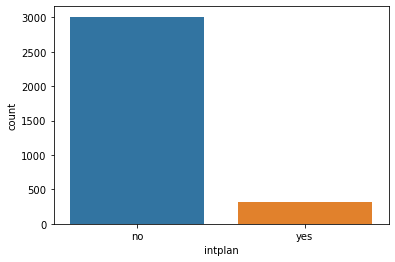

In [63]:
sns.countplot(x='intplan',data=df) 

<AxesSubplot:xlabel='intplan', ylabel='count'>

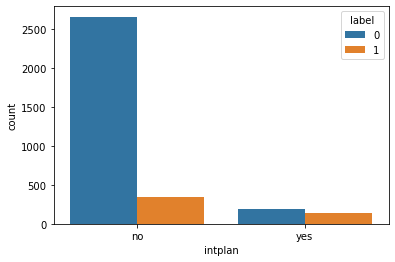

In [64]:
sns.countplot(x='intplan',hue='label',data=df) 

In [65]:
pd.crosstab(index=df['intplan'],columns=df['label'],margins=True)

label       0    1   All
intplan                 
no       2664  346  3010
yes       186  137   323
All      2850  483  3333

In [66]:
pd.crosstab(index=df['intplan'],columns=df['label'],normalize=True)

label           0         1
intplan                    
no       0.799280  0.103810
yes      0.055806  0.041104

### From this plot we can easily visualise that most of the customers having internet plan, are mostly going to be churned (10%) than the customers without having internet plan (4%).

<AxesSubplot:xlabel='voice', ylabel='count'>

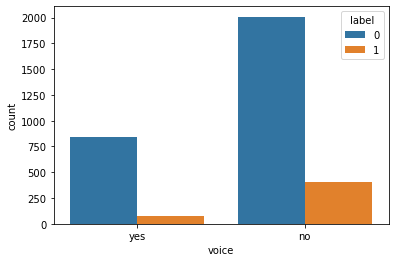

In [67]:
sns.countplot(x='voice',hue='label',data=df) 

In [68]:
df['voice'].value_counts()

no     2411
yes     922
Name: voice, dtype: int64

In [69]:
pd.crosstab(index=df['voice'],columns=df['label'],margins=True)

label     0    1   All
voice                 
no     2008  403  2411
yes     842   80   922
All    2850  483  3333

In [70]:
pd.crosstab(index=df['voice'],columns=df['label'],normalize=True)

label         0         1
voice                    
no     0.602460  0.120912
yes    0.252625  0.024002

### Here the difference is not significant but still we are visualizing that customers with no voice plan are going to be churned at higher rate (12%) than the customers  with a voice plan (2%). Though the difference is not that significant.

In [71]:
Xtrain1=Xtrain.drop('acclen',axis=1)
Xtest1=Xtest.drop('acclen',axis=1)

In [72]:
Xtrain1=Xtrain.drop('tdcal',axis=1)
Xtest1=Xtest.drop('tdcal',axis=1)

In [73]:
Xtrain1=Xtrain.drop('tncal',axis=1)
Xtest1=Xtest.drop('tncal',axis=1)

In [74]:
Xtrain1=Xtrain.drop('tecal',axis=1)
Xtest1=Xtest.drop('tecal',axis=1)

In [75]:
Xtrain1=Xtrain.drop('arcode_415',axis=1)
Xtest1=Xtest.drop('arcode_415',axis=1)

In [76]:
Xtrain1=Xtrain.drop('tnchar',axis=1)
Xtest1=Xtest.drop('tnchar',axis=1)

In [77]:
Xtrain1=Xtrain.drop('tnmin',axis=1)
Xtest1=Xtest.drop('tnmin',axis=1)

In [78]:
Xtrain1=Xtrain.drop('arcode_510',axis=1)
Xtest1=Xtest.drop('arcode_510',axis=1)

In [79]:
model=linear_model.LogisticRegression()
model.fit(Xtrain1,ytrain)
predtrain=model.predict(Xtrain1)
predtest=model.predict(Xtest1)

In [80]:
print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) # no change in the result of AUC and Recall score 

Training Metrics
------------------
AUC :  0.5889
Accuracy :  0.8648
Precision :  0.5775
Recall :  0.2025
F1 :  0.2998
Test Metrics
------------------
AUC :  0.5791
Accuracy :  0.854
Precision :  0.6087
Recall :  0.1795
F1 :  0.2772


### Here we have dropped 5 columns with the least weight but still recall and AUC score are same, so we can definitely drop these columns

### 2.Using Statsmodel

In [81]:
Xtrain[:5]

acclen  nummailmes     tdmin     tdcal    tdchar     temin     tecal  \
88   -0.675201    1.961023 -0.470125  0.175129 -0.469856 -1.530651 -0.797600   
278   0.758018    1.231858  0.242232 -0.783450  0.242286  0.498204  0.250637   
1437  0.632297    1.888107  1.205575  0.881450  1.205197  0.373504  0.250637   
166   2.115804    1.669357  0.188713  1.285062  0.189092 -0.740882  1.648287   
2560 -1.002075   -0.591053  0.327124 -1.691577  0.326961  1.262241  0.300553   

        tecahr     tnmin     tncal    tnchar     timin     tical    tichar  \
88   -1.530464  0.030087 -2.192227  0.028076  0.237134  1.856441  0.232482   
278   0.497801  1.061692 -2.089723  1.062088  0.237134  0.629735  0.232482   
1437  0.374382  0.202351  1.856691  0.204078 -0.194661  0.629735 -0.193992   
166  -0.741047  1.271577  1.344170  1.273290 -0.986285 -0.596971 -0.980303   
2560  1.261602  0.196411  0.831649  0.195278 -0.446541  0.629735 -0.447211   

          ncsc  intplan_yes  voice_yes  arcode_415  arcode_510  
88    0.326748            0          1           1           0  
278   0.326748            0          1           1           0  
1437  1.835592            1          1           1           0  
166  -0.427675            0          1           0           1  
2560 -0.427675            0          0           1           0

In [82]:
import statsmodels.api as sm
Xtrain_1=sm.add_constant(Xtrain) 
model=sm.GLM(ytrain,Xtrain_1,family=sm.families.Binomial()) 
results=model.fit()

In [83]:
Xtrain_1[:3] 

const    acclen  nummailmes     tdmin     tdcal    tdchar     temin  \
88      1.0 -0.675201    1.961023 -0.470125  0.175129 -0.469856 -1.530651   
278     1.0  0.758018    1.231858  0.242232 -0.783450  0.242286  0.498204   
1437    1.0  0.632297    1.888107  1.205575  0.881450  1.205197  0.373504   

         tecal    tecahr     tnmin     tncal    tnchar     timin     tical  \
88   -0.797600 -1.530464  0.030087 -2.192227  0.028076  0.237134  1.856441   
278   0.250637  0.497801  1.061692 -2.089723  1.062088  0.237134  0.629735   
1437  0.250637  0.374382  0.202351  1.856691  0.204078 -0.194661  0.629735   

        tichar      ncsc  intplan_yes  voice_yes  arcode_415  arcode_510  
88    0.232482  0.326748            0          1           1           0  
278   0.232482  0.326748            0          1           1           0  
1437 -0.193992  1.835592            1          1           1           0

In [84]:
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  label   No. Observations:                 2833
Model:                            GLM   Df Residuals:                     2813
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -914.18
Date:                Thu, 02 Jun 2022   Deviance:                       1828.4
Time:                        09:42:21   Pearson chi2:                 2.93e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.0325      0.212     -9.609      

### Columns having P-value <0.05 are significant columns. So, here the significant columns are - 'voice_yes', 'intplan_yes', 'ncsc' (no. of customer services calls), 'tical'(total international calls).

In [85]:
Xtrain2=Xtrain[['voice_yes','intplan_yes','ncsc','tical']]
Xtest2=Xtest[['voice_yes','intplan_yes','ncsc','tical']]

In [86]:
model=linear_model.LogisticRegression()
model.fit(Xtrain2,ytrain)
predtrain=model.predict(Xtrain2)
predtest=model.predict(Xtest2)

In [87]:
print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) 

Training Metrics
------------------
AUC :  0.5558
Accuracy :  0.8609
Precision :  0.5591
Recall :  0.1284
F1 :  0.2088
Test Metrics
------------------
AUC :  0.5378
Accuracy :  0.846
Precision :  0.5385
Recall :  0.0897
F1 :  0.1538


### Even after taking only the significant columns under consideration we are getting recall score of 0.12 for training data and 0.09 for test data

### 3.Feature selection using correlation

In [88]:
Xtrain[:5]

acclen  nummailmes     tdmin     tdcal    tdchar     temin     tecal  \
88   -0.675201    1.961023 -0.470125  0.175129 -0.469856 -1.530651 -0.797600   
278   0.758018    1.231858  0.242232 -0.783450  0.242286  0.498204  0.250637   
1437  0.632297    1.888107  1.205575  0.881450  1.205197  0.373504  0.250637   
166   2.115804    1.669357  0.188713  1.285062  0.189092 -0.740882  1.648287   
2560 -1.002075   -0.591053  0.327124 -1.691577  0.326961  1.262241  0.300553   

        tecahr     tnmin     tncal    tnchar     timin     tical    tichar  \
88   -1.530464  0.030087 -2.192227  0.028076  0.237134  1.856441  0.232482   
278   0.497801  1.061692 -2.089723  1.062088  0.237134  0.629735  0.232482   
1437  0.374382  0.202351  1.856691  0.204078 -0.194661  0.629735 -0.193992   
166  -0.741047  1.271577  1.344170  1.273290 -0.986285 -0.596971 -0.980303   
2560  1.261602  0.196411  0.831649  0.195278 -0.446541  0.629735 -0.447211   

          ncsc  intplan_yes  voice_yes  arcode_415  arcode_510  
88    0.326748            0          1           1           0  
278   0.326748            0          1           1           0  
1437  1.835592            1          1           1           0  
166  -0.427675            0          1           0           1  
2560 -0.427675            0          0           1           0

In [89]:
Xtrain.corr()

acclen  nummailmes     tdmin     tdcal    tdchar     temin  \
acclen       1.000000   -0.004291  0.003671  0.020245  0.003664  0.012957   
nummailmes  -0.004291    1.000000  0.009235 -0.005770  0.009234  0.008399   
tdmin        0.003671    0.009235  1.000000  0.009275  1.000000 -0.000910   
tdcal        0.020245   -0.005770  0.009275  1.000000  0.009279 -0.026651   
tdchar       0.003664    0.009234  1.000000  0.009279  1.000000 -0.000903   
temin        0.012957    0.008399 -0.000910 -0.026651 -0.000903  1.000000   
tecal        0.018462    0.004812  0.013196 -0.004184  0.013197 -0.010070   
tecahr       0.012965    0.008415 -0.000916 -0.026653 -0.000908  1.000000   
tnmin       -0.018727    0.004078 -0.002486  0.021729 -0.002484 -0.002944   
tncal       -0.034622    0.010635  0.026286 -0.031886  0.026284  0.027007   
tnchar      -0.018732    0.004076 -0.002499  0.021702 -0.002497 -0.002954   
timin       -0.003476   -0.014690 -0.010938  0.023408 -0.010940 -0.019561   
tical        0.017058    0.022312 -0.004048  0.007610 -0.004050  0.004078   
tichar      -0.003422   -0.014650 -0.010928  0.023471 -0.010930 -0.019637   
ncsc        -0.002331   -0.002933 -0.022738 -0.014969 -0.022744 -0.010808   
intplan_yes  0.021027    0.017153  0.051562  0.006574  0.051563  0.013033   
voice_yes    0.001069    0.957207  0.007484 -0.011971  0.007483  0.009506   
arcode_415   0.006444    0.019648  0.036222  0.007673  0.036226 -0.016466   
arcode_510  -0.024937   -0.005341 -0.012524 -0.008741 -0.012526  0.022903   

                tecal    tecahr     tnmin     tncal    tnchar     timin  \
acclen       0.018462  0.012965 -0.018727 -0.034622 -0.018732 -0.003476   
nummailmes   0.004812  0.008415  0.004078  0.010635  0.004076 -0.014690   
tdmin        0.013196 -0.000916 -0.002486  0.026286 -0.002499 -0.010938   
tdcal       -0.004184 -0.026653  0.021729 -0.031886  0.021702  0.023408   
tdchar       0.013197 -0.000908 -0.002484  0.026284 -0.002497 -0.010940   
temin       -0.010070  1.000000 -0.002944  0.027007 -0.002954 -0.019561   
tecal        1.000000 -0.010071  0.000973  0.019634  0.001017  0.008702   
tecahr      -0.010071  1.000000 -0.002957  0.027011 -0.002968 -0.019574   
tnmin        0.000973 -0.002957  1.000000 -0.000220  0.999999 -0.018211   
tncal        0.019634  0.027011 -0.000220  1.000000 -0.000234 -0.009874   
tnchar       0.001017 -0.002968  0.999999 -0.000234  1.000000 -0.018216   
timin        0.008702 -0.019574 -0.018211 -0.009874 -0.018216  1.000000   
tical        0.017807  0.004080 -0.010325 -0.002787 -0.010299  0.035228   
tichar       0.008674 -0.019649 -0.018175 -0.009923 -0.018180  0.999993   
ncsc         0.000053 -0.010807 -0.013093 -0.017634 -0.013098 -0.008779   
intplan_yes  0.013759  0.013035 -0.030865  0.017266 -0.030864  0.045452   
voice_yes    0.004988  0.009523  0.002847  0.019191  0.002845 -0.018766   
arcode_415   0.018813 -0.016483  0.021214  0.013986  0.021219  0.042453   
arcode_510  -0.019921  0.022932  0.005828  0.010121  0.005816 -0.013282   

                tical    tichar      ncsc  intplan_yes  voice_yes  arcode_415  \
acclen       0.017058 -0.003422 -0.002331     0.021027   0.001069    0.006444   
nummailmes   0.022312 -0.014650 -0.002933     0.017153   0.957207    0.019648   
tdmin       -0.004048 -0.010928 -0.022738     0.051562   0.007484    0.036222   
tdcal        0.007610  0.023471 -0.014969     0.006574  -0.011971    0.007673   
tdchar      -0.004050 -0.010930 -0.022744     0.051563   0.007483    0.036226   
temin        0.004078 -0.019637 -0.010808     0.013033   0.009506   -0.016466   
tecal        0.017807  0.008674  0.000053     0.013759   0.004988    0.018813   
tecahr       0.004080 -0.019649 -0.010807     0.013035   0.009523   -0.016483   
tnmin       -0.010325 -0.018175 -0.013093    -0.030865   0.002847    0.021214   
tncal       -0.002787 -0.009923 -0.017634     0.017266   0.019191    0.013986   
tnchar      -0.010299 -0.018180 -0.013098    -0.030864   0.002845    0.021219   
t

### Taking VIF to check correlation involving combination of columns

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame() 
vif['features']=Xtrain.columns
vif['vif']=[variance_inflation_factor(Xtrain.values,i) for i in range(Xtrain.shape[1])] 
vif['vif']=np.round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)

In [91]:
vif

features          vif
4        tdchar  10471983.57
2         tdmin  10471976.79
7        tecahr   2261963.05
5         temin   2261957.69
8         tnmin    634443.73
10       tnchar    634442.10
11        timin     68902.57
13       tichar     68901.99
16    voice_yes         7.71
1    nummailmes         6.06
17   arcode_415         2.05
18   arcode_510         1.55
15  intplan_yes         1.11
0        acclen         1.01
12        tical         1.01
9         tncal         1.01
14         ncsc         1.00
6         tecal         1.00
3         tdcal         1.00

### If VIF value <5 then we must not drop that column and if it is >5 but <10 then we need to check by taking and not taking these columns if our recall score is changing(we need to thin wheather to drop) or, not changing at all(then we can drop). If VIF value is >10 then we need not consider those columns. According to this rule we are selecting our columns and building our model.

In [92]:
Xtrain3=Xtrain[['arcode_415', 'arcode_510', 'intplan_yes','acclen','tical','tncal','ncsc','tecal','tdcal']]
Xtest3=Xtest[['arcode_415', 'arcode_510', 'intplan_yes','acclen','tical','tncal','ncsc','tecal','tdcal']]

In [93]:
model=linear_model.LogisticRegression()
model.fit(Xtrain3,ytrain)
predtrain=model.predict(Xtrain3)
predtest=model.predict(Xtest3)

In [94]:
print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest)

Training Metrics
------------------
AUC :  0.5506
Accuracy :  0.8609
Precision :  0.5663
Recall :  0.116
F1 :  0.1926
Test Metrics
------------------
AUC :  0.5366
Accuracy :  0.844
Precision :  0.5
Recall :  0.0897
F1 :  0.1522


### Still we are getting very bad recall score for training as well as test data. 

### So after checking all possible scenario of logistic regression we are not getting good recall value for test as well as train data. So logistic regression can not give a suitable model.

# D. Naive Bayes

In [95]:
from sklearn import naive_bayes #requires for naive bayes

### Base Model

In [96]:
model=naive_bayes.GaussianNB()#As we have already scaled all of our X-columns so these are continuous,so we can use GaussianNB()
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [97]:
printmetrics(ytrain,predtrain)

AUC :  0.7267
Accuracy :  0.8648
Precision :  0.5268
Recall :  0.5333
F1 :  0.5301


In [98]:
printmetrics(ytest,predtest)

AUC :  0.7133
Accuracy :  0.86
Precision :  0.5571
Recall :  0.5
F1 :  0.527


### Here AUC and recall scores are better than the Logistic and k-Nearest Neighbor

# E. k - Nearest Neighbor

In [99]:
from sklearn import neighbors

### As we have already implemented OHE and Standard Scaling, we can directly build kNN model

### Base Model

In [100]:
model=neighbors.KNeighborsClassifier(n_neighbors=5,algorithm='ball_tree')
model.fit(Xtrain,ytrain)

KNeighborsClassifier(algorithm='ball_tree')

In [101]:
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [102]:
printmetrics(ytrain,predtrain)

AUC :  0.6831
Accuracy :  0.9082
Precision :  0.9739
Recall :  0.3679
F1 :  0.5341


In [103]:
printmetrics(ytest,predtest)

AUC :  0.6555
Accuracy :  0.886
Precision :  0.8621
Recall :  0.3205
F1 :  0.4673


### Here also we are not getting good recall score for test as well as train data

### k- Nearest Neighbor selection using GridsearchCV

In [104]:
knn=neighbors.KNeighborsClassifier(algorithm='brute')
k_range=[5,7,9,11,13,15,17,19,21,23,25,27]
pdict={'n_neighbors':k_range}
gridobj=model_selection.GridSearchCV(estimator=knn,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1,return_train_score=True)
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(algorithm='brute'), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27]},
             return_train_score=True, scoring='recall')

In [105]:
gridobj.best_score_

0.2518518518518518

In [106]:
gridobj.best_params_

{'n_neighbors': 5}

In [107]:
bestmodel=gridobj.best_estimator_

In [108]:
bestmodel.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [109]:
trainpred=bestmodel.predict(Xtrain)
testpred=bestmodel.predict(Xtest)

In [110]:
printmetrics(ytrain,trainpred)

AUC :  0.6831
Accuracy :  0.9082
Precision :  0.9739
Recall :  0.3679
F1 :  0.5341


In [111]:
printmetrics(ytest,testpred)

AUC :  0.6555
Accuracy :  0.886
Precision :  0.8621
Recall :  0.3205
F1 :  0.4673


In [112]:
cvresults=pd.DataFrame(gridobj.cv_results_)
cvresults

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.003124      0.006248         0.149965        0.030612   
1        0.009373      0.007653         0.103100        0.007653   
2        0.006248      0.007653         0.115598        0.007653   
3        0.015625      0.000004         0.103097        0.007651   
4        0.006249      0.007653         0.106225        0.006249   
5        0.009373      0.007653         0.106226        0.011690   
6        0.006249      0.007653         0.109349        0.009879   
7        0.006248      0.007653         0.109349        0.000001   
8        0.009373      0.007653         0.103100        0.015931   
9        0.006249      0.007653         0.109350        0.009880   
10       0.009373      0.007653         0.103102        0.007655   
11       0.006249      0.007654         0.115597        0.007653   

   param_n_neighbors               params  split0_test_score  \
0                  5   {'n_neighbors': 5}           0.209877   
1                  7   {'n_neighbors': 7}           0.160494   
2                  9   {'n_neighbors': 9}           0.123457   
3                 11  {'n_neighbors': 11}           0.061728   
4                 13  {'n_neighbors': 13}           0.123457   
5                 15  {'n_neighbors': 15}           0.074074   
6                 17  {'n_neighbors': 17}           0.098765   
7                 19  {'n_neighbors': 19}           0.086420   
8                 21  {'n_neighbors': 21}           0.061728   
9                 23  {'n_neighbors': 23}           0.049383   
10                25  {'n_neighbors': 25}           0.049383   
11                27  {'n_neighbors': 27}           0.049383   

    split1_test_score  split2_test_score  split3_test_score  ...  \
0            0.222222           0.358025           0.172840  ...   
1            0.222222           0.308642           0.172840  ...   
2            0.185185           0.259259           0.148148  ...   
3            0.185185           0.234568           0.135802  ...   
4            0.160494           0.209877           0.098765  ...   
5            0.135802           0.185185           0.086420  ...   
6            0.148148           0.185185           0.086420  ...   
7            0.123457           0.172840           0.061728  ...   
8            0.098765           0.160494           0.061728  ...   
9            0.098765           0.172840           0.074074  ...   
10           0.086420           0.172840           0.074074  ...   
11           0.086420           0.185185           0.061728  ...   

    mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.251852        0.066529                1            0.364198   
1          0.227160        0.056629                2            0.308642   
2          0.185185        0.047495                3            0.259259   
3          0.162963        0.059669                4            0.237654   
4          0.153086        0.038727                5            0.206790   
5          0.130864        0.044581                7            0.188272   
6          0.135802        0.037446                6            0.154321   
7          0.111111        0.037446                8            0.154321   
8          0.098765        0.036623               10            0.138889   
9          0.098765        0.041317               10            0.108025   
10         0.098765        0.042048               10            0.114198   
11         0.101235        0.049011                9            0.111111   

    split1_train_score  split2_train_score  split3_train_score  \
0             0.351852            0.354938            0.388889   
1             0.305556            0.302469            0.330247   
2             0.287037            0.274691            0.299383   
3             0.246914            0.243827            0.246914   
4             0.200617            0.203704            0.209877   
5             0.

In [113]:
list(cvresults)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_n_neighbors',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [114]:
cvresults[['params','mean_train_score','mean_test_score']]

params  mean_train_score  mean_test_score
0    {'n_neighbors': 5}          0.369753         0.251852
1    {'n_neighbors': 7}          0.316667         0.227160
2    {'n_neighbors': 9}          0.279630         0.185185
3   {'n_neighbors': 11}          0.244444         0.162963
4   {'n_neighbors': 13}          0.209877         0.153086
5   {'n_neighbors': 15}          0.187654         0.130864
6   {'n_neighbors': 17}          0.159877         0.135802
7   {'n_neighbors': 19}          0.151235         0.111111
8   {'n_neighbors': 21}          0.135802         0.098765
9   {'n_neighbors': 23}          0.125309         0.098765
10  {'n_neighbors': 25}          0.120988         0.098765
11  {'n_neighbors': 27}          0.108025         0.101235

### Using GridSearchCV we got best model with 'n_neighbors' = 5 and here the recall score is 0.37 and 0.32 for train and test data respectively and AUC score is 0.68 and 0.65 for train and test data respectively

# B. Decision Tree

In [115]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from sklearn import model_selection
warnings.filterwarnings('ignore')

from sklearn import feature_selection #required for RFE

In [116]:
df=pd.read_csv('g:/data/churn_train.csv')

In [117]:
df['label']=df['label'].replace({'True.':1,'False.':0})
X=df.drop('label',axis=1) #dropping the target column
y=df['label']

In [118]:
catcols=list(X.select_dtypes(include='object').columns)
numcols=list(X.select_dtypes(exclude='object').columns)

In [119]:
catcols

['st', 'phnum', 'intplan', 'voice']

In [120]:
numcols.remove('arcode')
catcols.append('arcode')

In [121]:
numcols

['acclen',
 'nummailmes',
 'tdmin',
 'tdcal',
 'tdchar',
 'temin',
 'tecal',
 'tecahr',
 'tnmin',
 'tncal',
 'tnchar',
 'timin',
 'tical',
 'tichar',
 'ncsc']

In [122]:
catcols

['st', 'phnum', 'intplan', 'voice', 'arcode']

In [123]:
X=X.drop('phnum',axis=1)
X=X.drop('st',axis=1)

In [124]:
X['intplan'].unique()

array(['no', 'yes'], dtype=object)

In [125]:
X['voice'].unique()

array(['yes', 'no'], dtype=object)

In [126]:
X['arcode'].unique()

array([415, 408, 510], dtype=int64)

In [127]:
X['intplan']=X['intplan'].replace({'yes':1,'no':0})
X['voice']=X['voice'].replace({'yes':1,'no':0})
X['arcode']=X['arcode'].replace({408:1,415:2,510:3})

In [128]:
X[:3]

acclen  arcode  intplan  voice  nummailmes  tdmin  tdcal  tdchar  temin  \
0     128       2        0      1          25  265.1    110   45.07  197.4   
1     107       2        0      1          26  161.6    123   27.47  195.5   
2     137       2        0      0           0  243.4    114   41.38  121.2   

   tecal  tecahr  tnmin  tncal  tnchar  timin  tical  tichar  ncsc  
0     99   16.78  244.7     91   11.01   10.0      3    2.70     1  
1    103   16.62  254.4    103   11.45   13.7      3    3.70     1  
2    110   10.30  162.6    104    7.32   12.2      5    3.29     0

In [129]:
Xtrain,Xtest,ytrain,ytest=model_selection.train_test_split(X,y,test_size=0.15,random_state=42)

### Here we will not perform any feature scaling as tree are not sensitive to the variance in the data

### Creating Base Model without constraining the tree

In [130]:
model=tree.DecisionTreeClassifier(random_state=42) #balancing an unconstrained tree
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [131]:
print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)#overfit
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) # no change in the values after 

Training Metrics
------------------
AUC :  1.0
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0
Test Metrics
------------------
AUC :  0.8362
Accuracy :  0.9
Precision :  0.6591
Recall :  0.7436
F1 :  0.6988


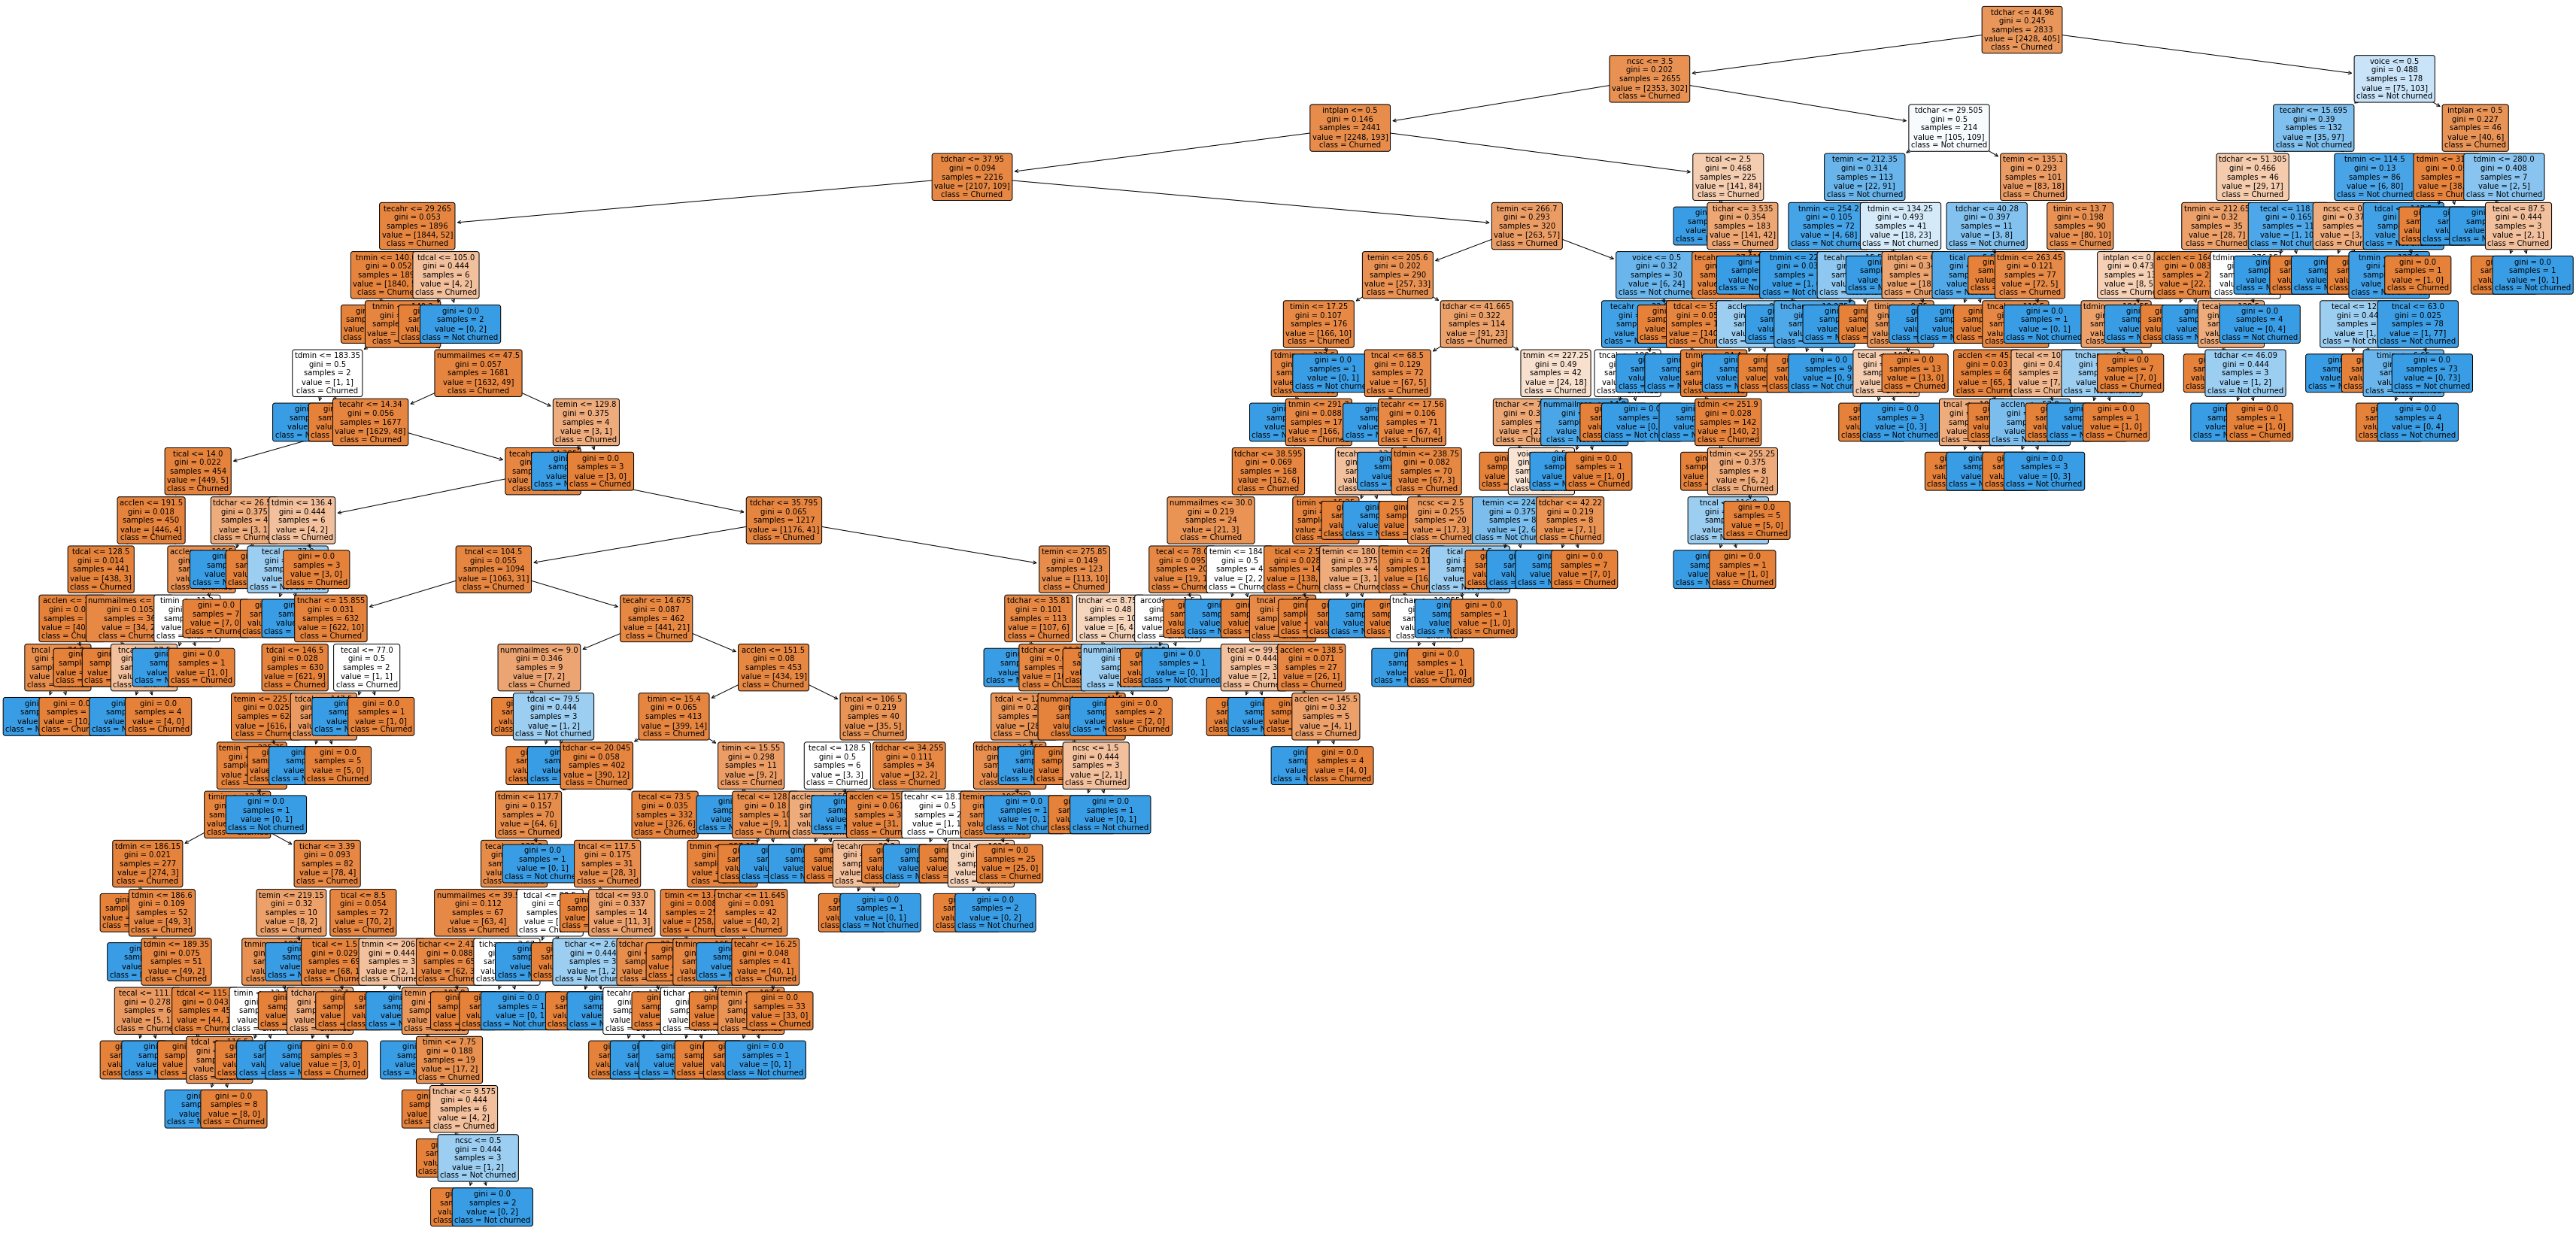

In [132]:
plt.figure(figsize=(60, 30))
tree.plot_tree(model, 
               filled=True, rounded=True, 
               feature_names = Xtrain.columns,
               class_names = ['Churned','Not churned'],
               fontsize=10)
plt.show()

## Feature Selection
### 1. Ranking columns according to their importance

In [133]:
model.feature_importances_

array([0.01584273, 0.0014405 , 0.07805985, 0.05146697, 0.01522751,
       0.04881163, 0.02307132, 0.22721485, 0.09049858, 0.03358004,
       0.0540575 , 0.0354946 , 0.02577222, 0.01909716, 0.01821036,
       0.06539267, 0.08310004, 0.11366146])

In [134]:
pd.Series(model.feature_importances_,index=Xtrain.columns).sort_values(ascending=False)

tdchar        0.227215
ncsc          0.113661
temin         0.090499
tichar        0.083100
intplan       0.078060
tical         0.065393
tecahr        0.054058
voice         0.051467
tdmin         0.048812
tnmin         0.035495
tecal         0.033580
tncal         0.025772
tdcal         0.023071
tnchar        0.019097
timin         0.018210
acclen        0.015843
nummailmes    0.015228
arcode        0.001440
dtype: float64

In [135]:
Xtrain1=Xtrain.drop('arcode',axis=1)
Xtest1=Xtest.drop('arcode',axis=1)

In [136]:
Xtrain1=Xtrain.drop('nummailmes',axis=1)
Xtest1=Xtest.drop('nummailmes',axis=1)

In [137]:
Xtrain1=Xtrain.drop('acclen',axis=1)
Xtest1=Xtest.drop('acclen',axis=1)

In [138]:
Xtrain1=Xtrain.drop('timin',axis=1)
Xtest1=Xtest.drop('timin',axis=1)

In [139]:
Xtrain1=Xtrain.drop('tnchar',axis=1)
Xtest1=Xtest.drop('tnchar',axis=1)

In [140]:
model=tree.DecisionTreeClassifier(random_state=42) #balancing an unconstrained tree
model.fit(Xtrain1,ytrain)
predtrain=model.predict(Xtrain1)
predtest=model.predict(Xtest1)

In [141]:
print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) #Recall for test data has increased a bit but as Recall score of training data is 1.0 so overfit

Training Metrics
------------------
AUC :  1.0
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0
Test Metrics
------------------
AUC :  0.8514
Accuracy :  0.908
Precision :  0.6818
Recall :  0.7692
F1 :  0.7229


### Constraining the tree

In [142]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=5)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) 

Training Metrics
------------------
AUC :  0.8578
Accuracy :  0.9555
Precision :  0.9574
Recall :  0.721
F1 :  0.8225
Test Metrics
------------------
AUC :  0.8338
Accuracy :  0.94
Precision :  0.9138
Recall :  0.6795
F1 :  0.7794


In [143]:
model=tree.DecisionTreeClassifier(random_state=42,max_depth=6)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) # after taking max depth as 6 we are getting a 0.76 recall score on training and 0.73 on test data

Training Metrics
------------------
AUC :  0.88
Accuracy :  0.9636
Precision :  0.9778
Recall :  0.763
F1 :  0.8571
Test Metrics
------------------
AUC :  0.8571
Accuracy :  0.944
Precision :  0.8906
Recall :  0.7308
F1 :  0.8028


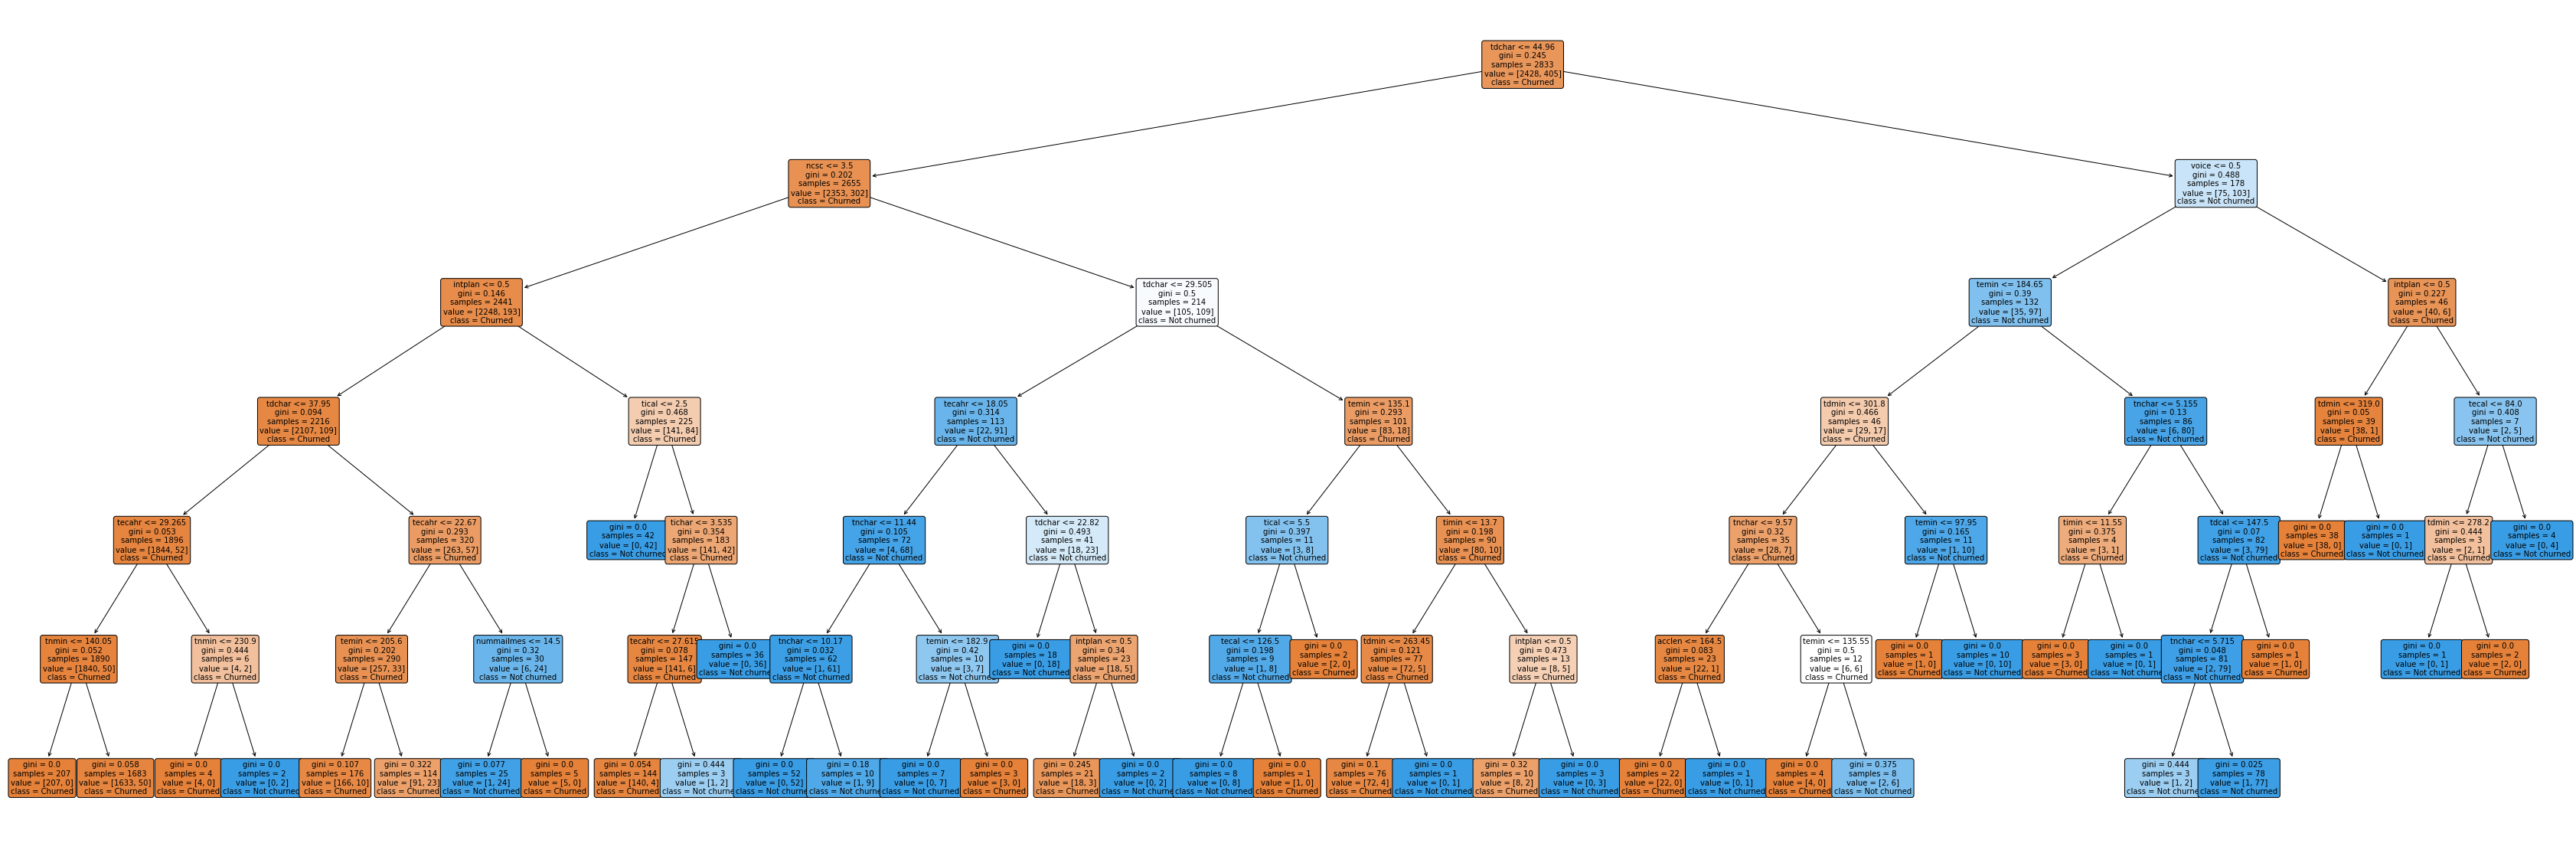

In [144]:
plt.figure(figsize=(60,20))
tree.plot_tree(model, 
               filled=True, rounded=True, 
               feature_names = Xtrain.columns,
               class_names = ['Churned','Not churned'],
               fontsize=10)
plt.show()

In [145]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_split=20,min_samples_leaf=10)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) #here also we are getting a better result by restricting min_sample_split and min_samples_leaf

Training Metrics
------------------
AUC :  0.8623
Accuracy :  0.9545
Precision :  0.934
Recall :  0.7333
F1 :  0.8216
Test Metrics
------------------
AUC :  0.8455
Accuracy :  0.942
Precision :  0.9016
Recall :  0.7051
F1 :  0.7914


In [146]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_split=15,min_samples_leaf=15)
model.fit(Xtrain1,ytrain)
predtrain=model.predict(Xtrain1)
predtest=model.predict(Xtest1)

print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) #here we have considered Xtrain1 i.e. columns left after dropping the last 4 unimportant columns

Training Metrics
------------------
AUC :  0.8714
Accuracy :  0.9523
Precision :  0.8924
Recall :  0.758
F1 :  0.8198
Test Metrics
------------------
AUC :  0.8675
Accuracy :  0.944
Precision :  0.8676
Recall :  0.7564
F1 :  0.8082


In [147]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_split=15,min_samples_leaf=15)
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

print('Training Metrics')
print('------------------')
printmetrics(ytrain,predtrain)
print('Test Metrics')
print('------------------')
printmetrics(ytest,predtest) #here also we are getting a better result by restricting min_sample_split and min_samples_leaf

Training Metrics
------------------
AUC :  0.8714
Accuracy :  0.9523
Precision :  0.8924
Recall :  0.758
F1 :  0.8198
Test Metrics
------------------
AUC :  0.8675
Accuracy :  0.944
Precision :  0.8676
Recall :  0.7564
F1 :  0.8082


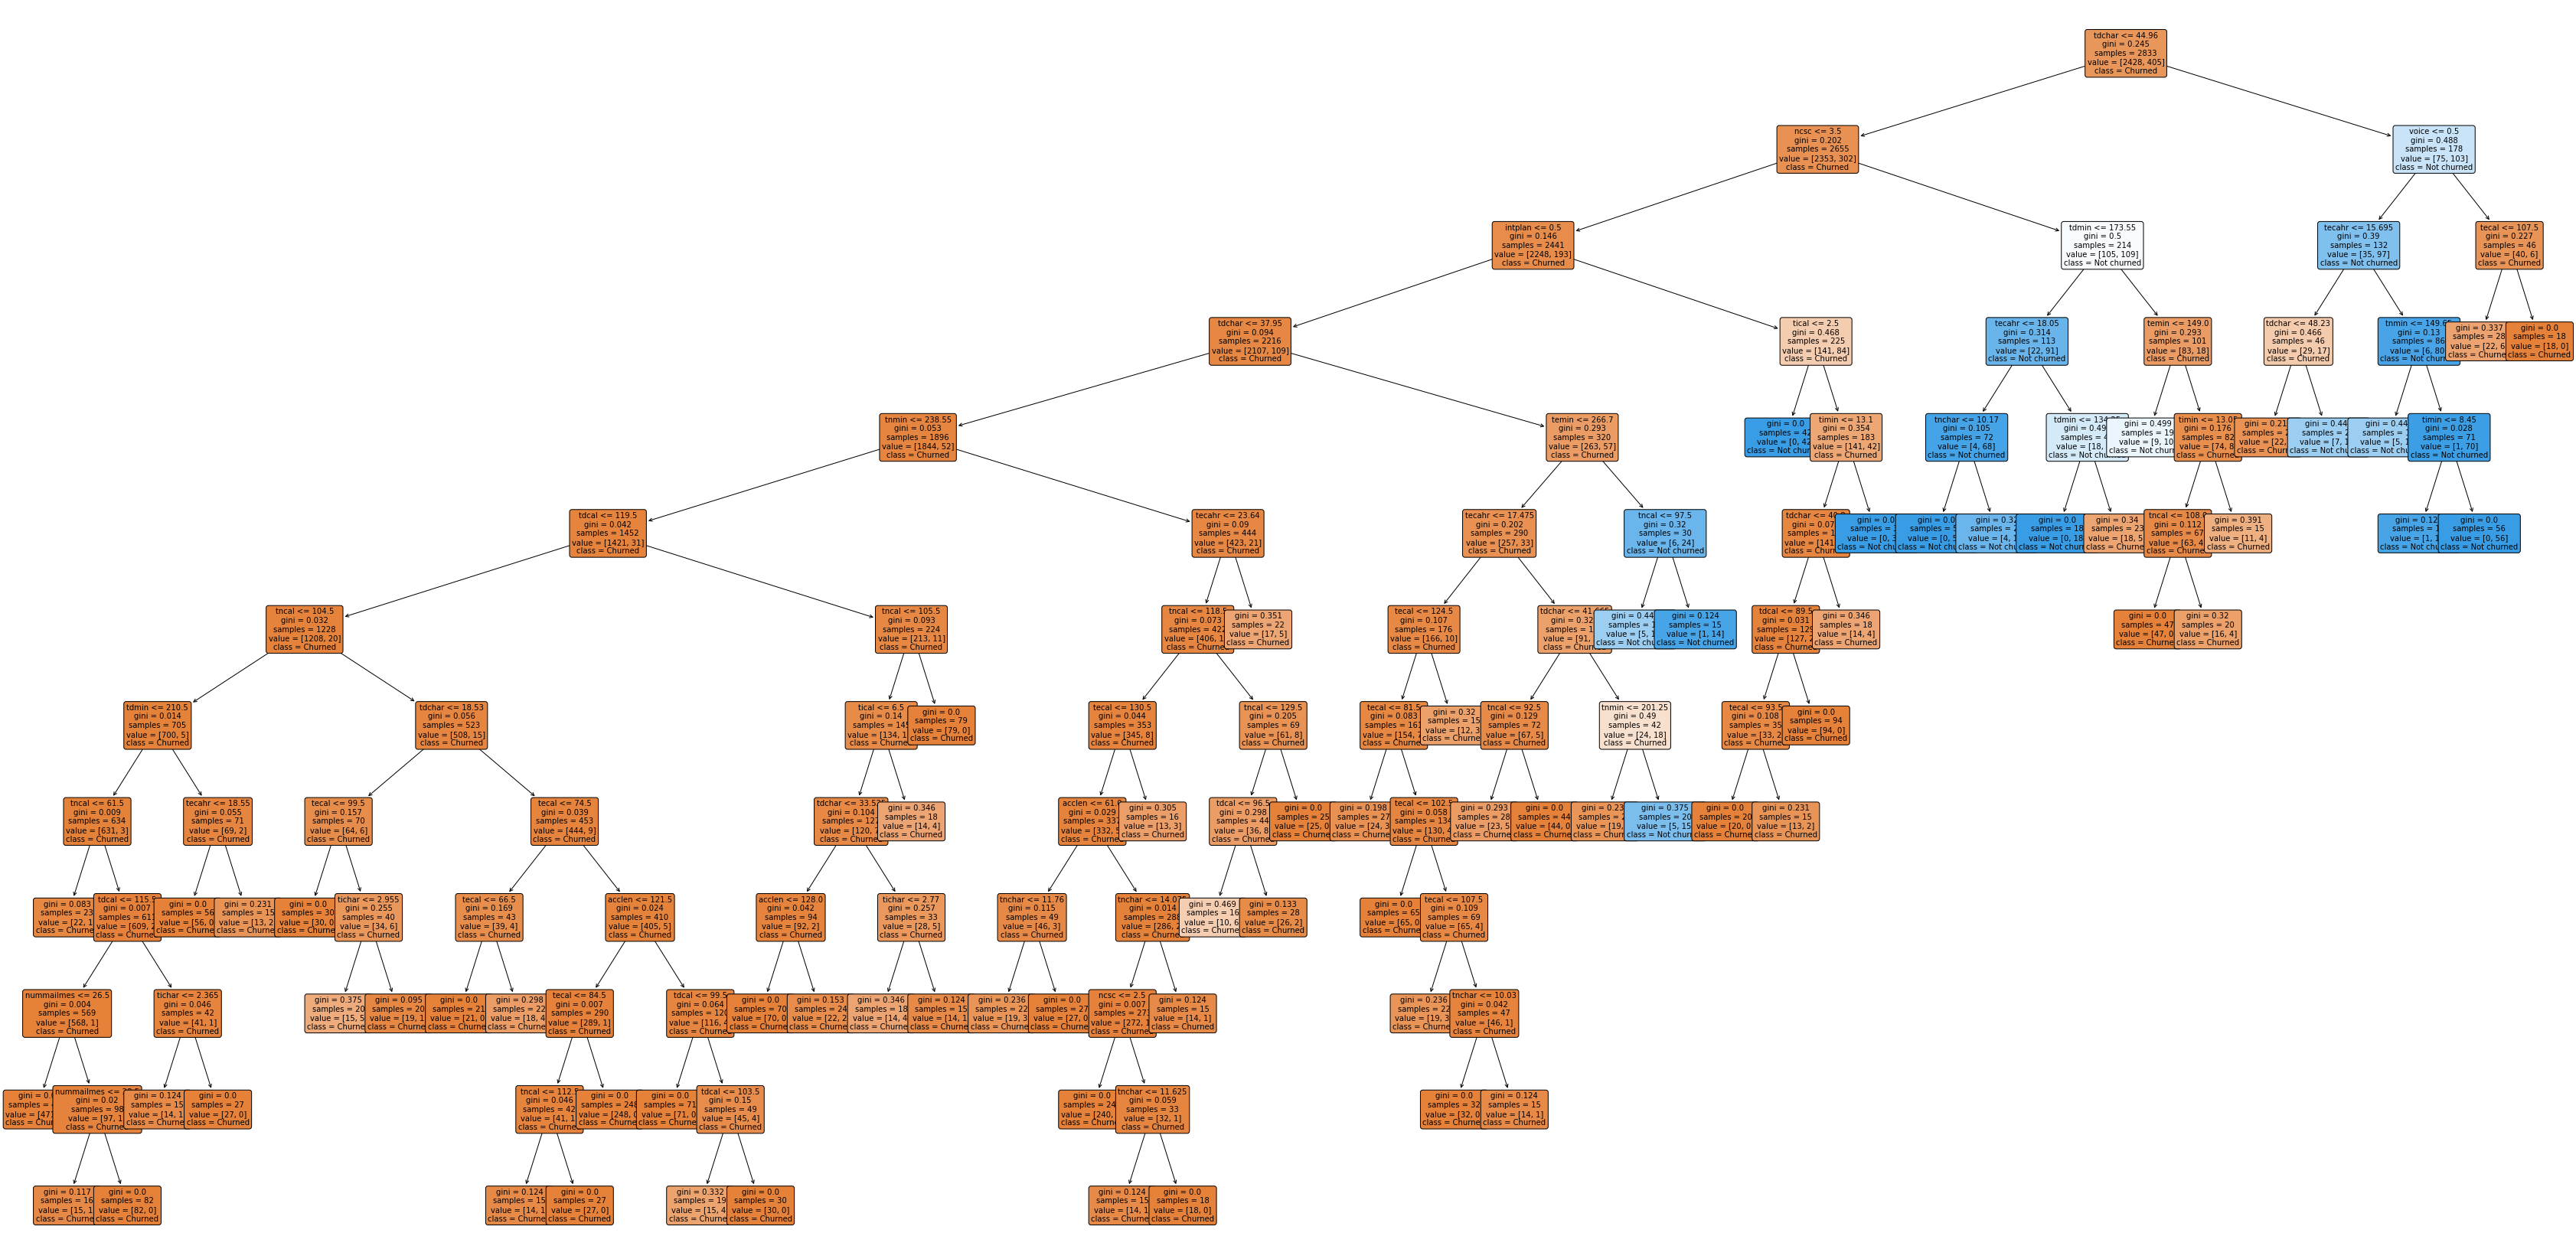

In [148]:
plt.figure(figsize=(60, 30))
tree.plot_tree(model, 
               filled=True, rounded=True, 
               feature_names = Xtrain.columns,
               class_names = ['Churned','Not churned'],
               fontsize=10)
plt.show()

### Here we are getting a better result by restricting min_sample_split and min_samples_leaf and we are getting Recall score of almost 0.76 for both training as well as test data and an AUC score of 0.87 for both training and test data taking all the colmns under consideration.

### Using Cross Validation

In [149]:
Xtrain.shape

(2833, 18)

In [150]:
model=tree.DecisionTreeClassifier(random_state=42) 
recallarr=model_selection.cross_val_score(estimator=model,X=Xtrain,y=ytrain,cv=5,scoring='recall')

In [151]:
recallarr

array([0.69135802, 0.7037037 , 0.77777778, 0.65432099, 0.74074074])

In [152]:
recallarr.mean()

0.7135802469135802

In [153]:
recallarr.std() #standard deviation is small enough so we can assure that the decision tree is working consistently

0.04233685975180801

In [154]:
model=tree.DecisionTreeClassifier(random_state=42) 
model.fit(Xtrain,ytrain)
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [155]:
printmetrics(ytrain,predtrain)

AUC :  1.0
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0


In [156]:
printmetrics(ytest,predtest)

AUC :  0.8362
Accuracy :  0.9
Precision :  0.6591
Recall :  0.7436
F1 :  0.6988


In [157]:
model=tree.DecisionTreeClassifier(random_state=42) 
recallarr=model_selection.cross_val_score(estimator=model,X=Xtrain,y=ytrain,cv=5,scoring='roc_auc')

In [158]:
recallarr

array([0.80967078, 0.81893004, 0.85185185, 0.80654194, 0.84047346])

In [159]:
recallarr.mean()

0.8254936150354248

In [160]:
recallarr.std() #here also the standard deviation is very low

0.017729981072031453

## Hyperparameter Tuning

### Tuning hyperparameter 'max_depth'

In [161]:
model=tree.DecisionTreeClassifier(random_state=42)
pdict={'max_depth':[20,21,22,25,26]}
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1)
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 21, 22, 25, 26]}, scoring='recall')

In [162]:
gridobj.best_score_

0.7135802469135802

In [163]:
gridobj.best_params_

{'max_depth': 25}

In [164]:
bestmodel=gridobj.best_estimator_

In [165]:
bestmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [166]:
trainpred=bestmodel.predict(Xtrain)
testpred=bestmodel.predict(Xtest)

In [167]:
printmetrics(ytrain,trainpred) #still overfit as recall=1.0

AUC :  1.0
Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1 :  1.0


In [168]:
printmetrics(ytest,testpred)

AUC :  0.8362
Accuracy :  0.9
Precision :  0.6591
Recall :  0.7436
F1 :  0.6988


### Tuning 'min_samples_split' and 'min_samples_leaf' hyperparameters

In [169]:
model=tree.DecisionTreeClassifier(random_state=42)
pdict={'min_samples_split':[15,20,30,35,40],'min_samples_leaf':[10,15,16,20]}
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1) 

In [170]:
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [10, 15, 16, 20],
                         'min_samples_split': [15, 20, 30, 35, 40]},
             scoring='recall')

In [171]:
gridobj.best_score_

0.7061728395061728

In [172]:
gridobj.best_params_ 

{'min_samples_leaf': 10, 'min_samples_split': 35}

In [173]:
bestmodel=gridobj.best_estimator_ 

In [174]:
bestmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 10,
 'min_samples_split': 35,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [175]:
trainpred=bestmodel.predict(Xtrain)
testpred=bestmodel.predict(Xtest)

In [176]:
printmetrics(ytrain,trainpred) 

AUC :  0.8623
Accuracy :  0.9545
Precision :  0.934
Recall :  0.7333
F1 :  0.8216


In [177]:
printmetrics(ytest,testpred) 

AUC :  0.8455
Accuracy :  0.942
Precision :  0.9016
Recall :  0.7051
F1 :  0.7914


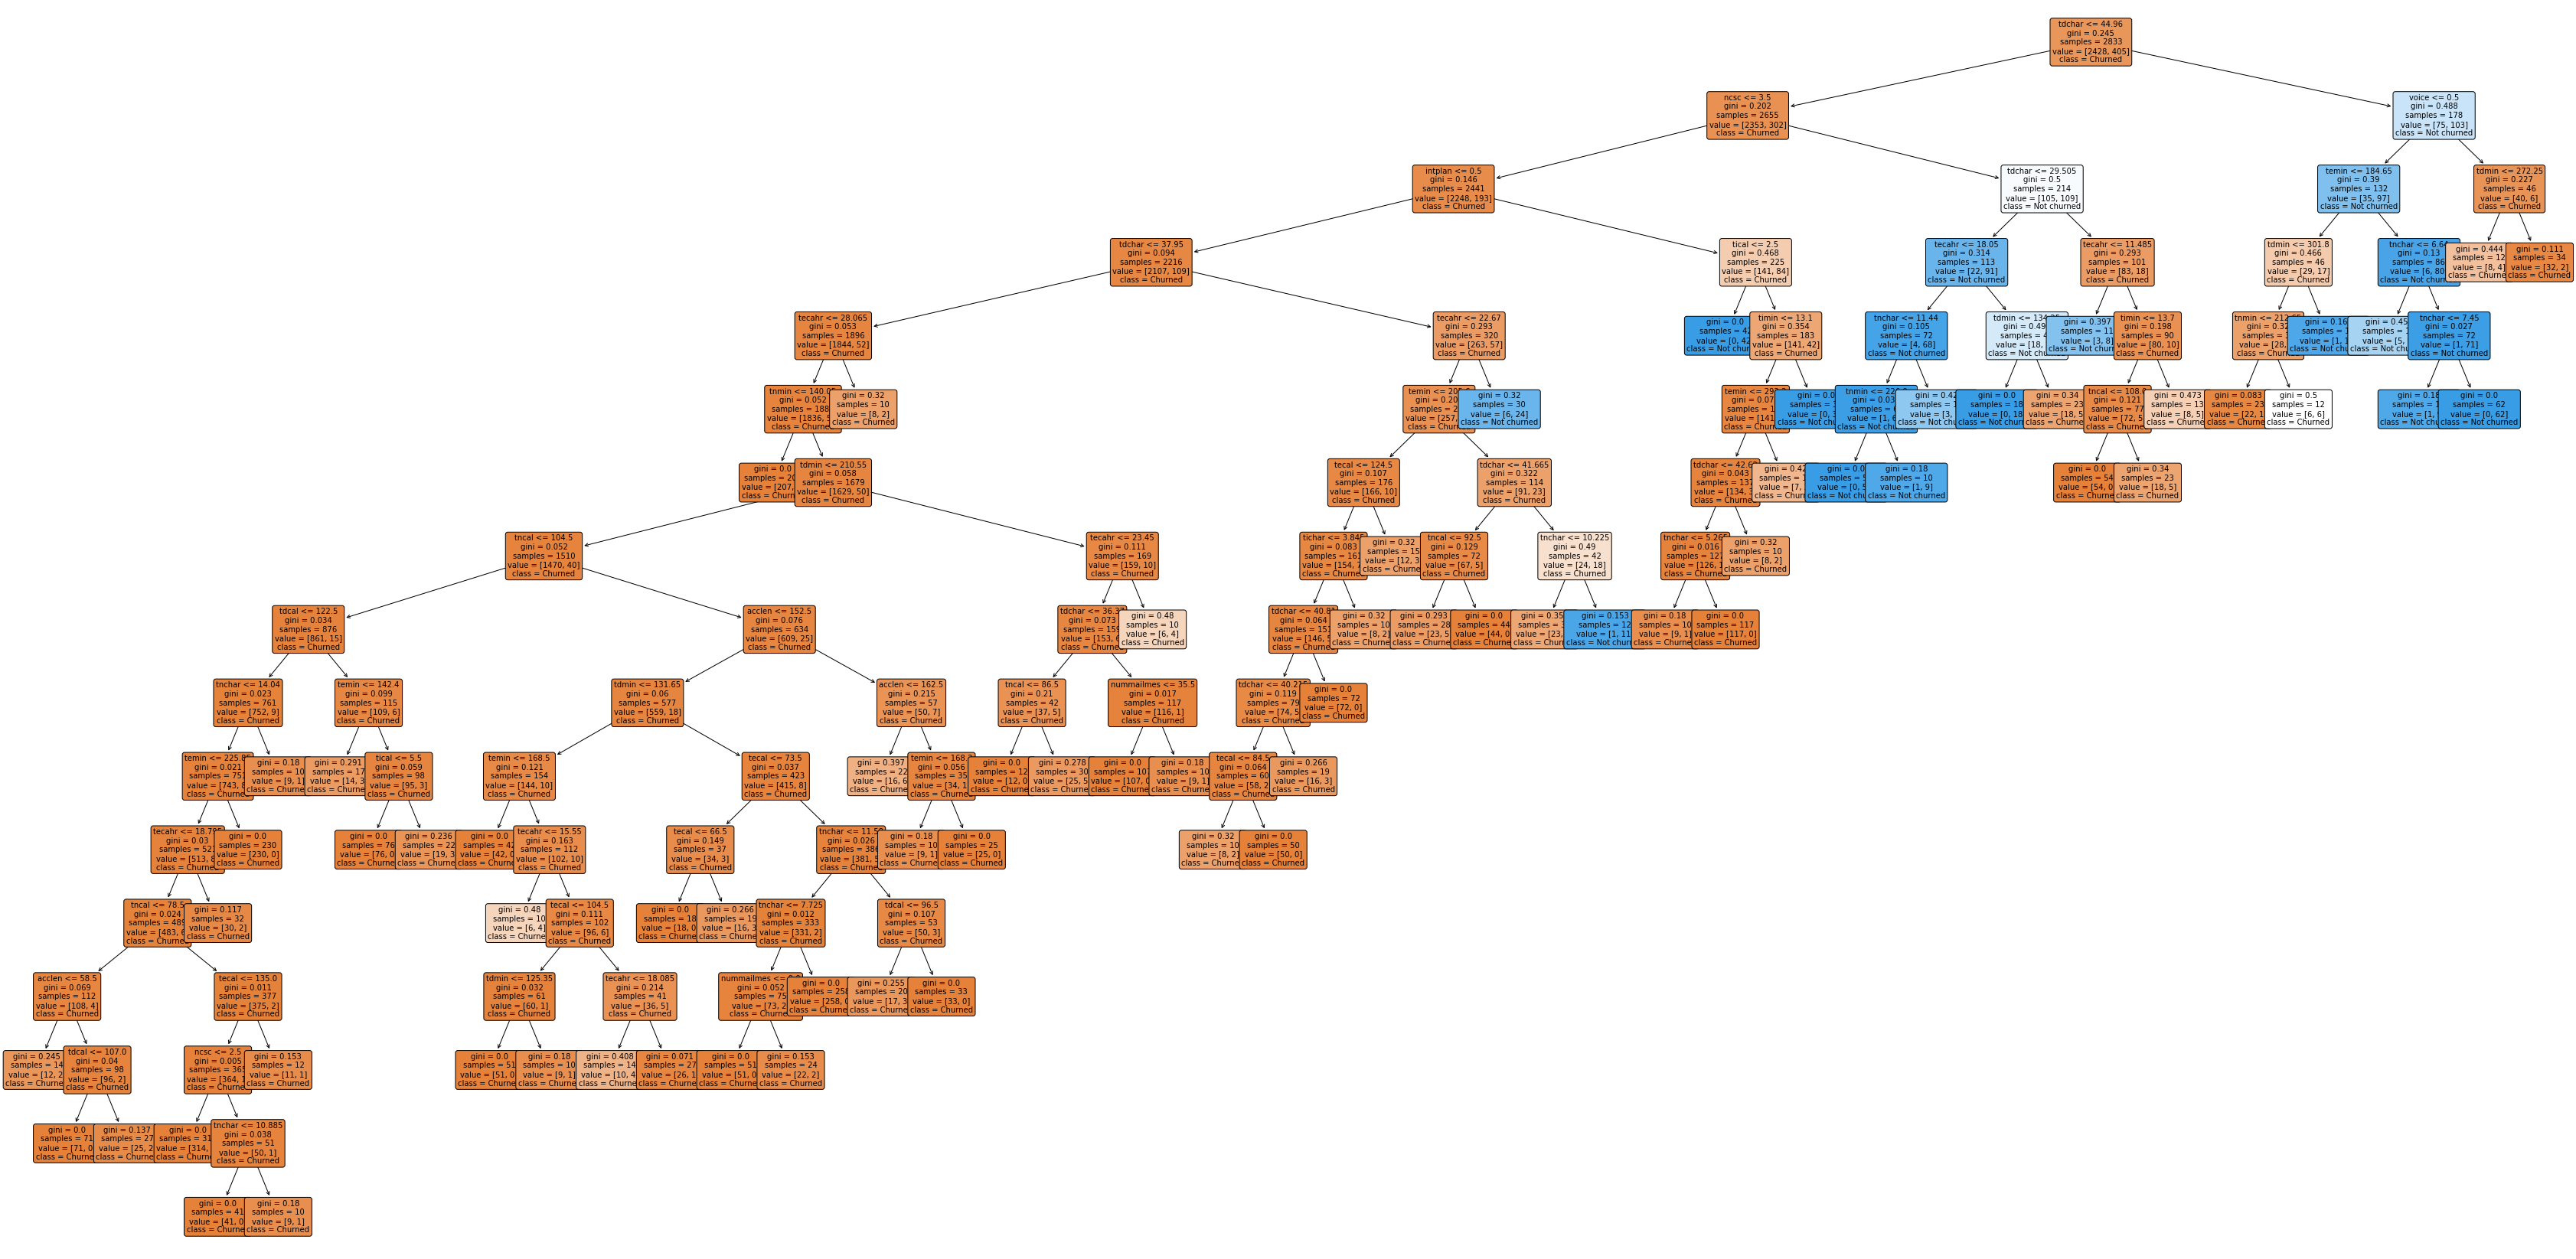

In [178]:
plt.figure(figsize=(60, 30))
tree.plot_tree(bestmodel, 
               filled=True, rounded=True, 
               feature_names = Xtrain.columns,
               class_names = ['Churned','Not churned'],
               fontsize=10)
plt.show()

### From here we can see that we are getting best recall for training as 0.73 and 0.71 for test data at 'min_samples_leaf': 10, 'min_samples_split': 35

In [179]:
model=tree.DecisionTreeClassifier(random_state=42)
pdict={'min_samples_split':[15,20,30,35,40],'min_samples_leaf':[10,15,16,20]}
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1,return_train_score=True)

In [180]:
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': [10, 15, 16, 20],
                         'min_samples_split': [15, 20, 30, 35, 40]},
             return_train_score=True, scoring='recall')

In [181]:
cvresults=pd.DataFrame(gridobj.cv_results_)
cvresults

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.059354      0.006245         0.009374        0.007653   
1        0.049988      0.011690         0.006249        0.007653   
2        0.053112      0.012497         0.000000        0.000000   
3        0.046863      0.009881         0.003125        0.006249   
4        0.046863      0.000001         0.009373        0.007653   
5        0.043740      0.006249         0.003124        0.006248   
6        0.048409      0.012467         0.007445        0.007024   
7        0.047287      0.012827         0.004720        0.006266   
8        0.046138      0.002998         0.009375        0.007655   
9        0.037491      0.007652         0.006249        0.007653   
10       0.049988      0.006249         0.003124        0.006248   
11       0.041732      0.006529         0.006249        0.007653   
12       0.044765      0.007119         0.007456        0.007022   
13       0.047273      0.009246         0.006249        0.007653   
14       0.046864      0.009879         0.006248        0.007652   
15       0.043739      0.006249         0.003124        0.006249   
16       0.043739      0.006248         0.006249        0.007653   
17       0.043739      0.006248         0.006249        0.007653   
18       0.046864      0.009880         0.003126        0.006253   
19       0.037491      0.007653         0.009373        0.007653   

   param_min_samples_leaf param_min_samples_split  \
0                      10                      15   
1                      10                      20   
2                      10                      30   
3                      10                      35   
4                      10                      40   
5                      15                      15   
6                      15                      20   
7                      15                      30   
8                      15                      35   
9                      15                      40   
10                     16                      15   
11                     16                      20   
12                     16                      30   
13                     16                      35   
14                     16                      40   
15                     20                      15   
16                     20                      20   
17                     20                      30   
18                     20                      35   
19                     20                      40   

                                               params  split0_test_score  \
0   {'min_samples_leaf': 10, 'min_samples_split': 15}           0.691358   
1   {'min_samples_leaf': 10, 'min_samples_split': 20}           0.691358   
2   {'min_samples_leaf': 10, 'min_samples_split': 30}           0.716049   
3   {'min_samples_leaf': 10, 'min_samples_split': 35}           0.716049   
4   {'min_samples_leaf': 10, 'min_samples_split': 40}           0.666667   
5   {'min_samples_leaf': 15, 'min_samples_split': 15}           0.753086   
6   {'min_samples_leaf': 15, 'min_samples_split': 20}           0.753086   
7   {'min_samples_leaf': 15, 'min_samples_split': 30}           0.753086   
8   {'min_samples_leaf': 15, 'min_samples_split': 35}           0.716049   
9   {'min_samples_leaf': 15, 'min_samples_split': 40}           0.666667   
10  {'min_samples_leaf': 16, 'min_samples_split': 15}           0.654321   
11  {'min_samples_leaf': 16, 'min_samples_split': 20}           0.654321   
12  {'min_samples_leaf': 16, 'min_samples_split': 30}           0.654321   
13  {'min_samples_leaf': 16, 'min_samples_split': 35}           0.654321   
14  {'min_samples_leaf': 16, 'min_samples_split': 40}           0.604938   
15  {'min_samples_leaf': 20, 'min_samples_split': 15}           0.604938   
16  {'min_samples_leaf': 20, 'min_samples_split': 20}           0.604938   
17  {'min_samples_leaf': 20, 'min_samples_split': 30}           0.604938   
18  {'min_samples

In [182]:
list(cvresults) 

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [183]:
cvresults[['params','mean_train_score','mean_test_score']] #from here we can see that the best recall for test data is 0.71 at'min_samples_leaf': 10, 'min_samples_split': 35

params  mean_train_score  \
0   {'min_samples_leaf': 10, 'min_samples_split': 15}          0.748765   
1   {'min_samples_leaf': 10, 'min_samples_split': 20}          0.748765   
2   {'min_samples_leaf': 10, 'min_samples_split': 30}          0.743210   
3   {'min_samples_leaf': 10, 'min_samples_split': 35}          0.743210   
4   {'min_samples_leaf': 10, 'min_samples_split': 40}          0.690741   
5   {'min_samples_leaf': 15, 'min_samples_split': 15}          0.738272   
6   {'min_samples_leaf': 15, 'min_samples_split': 20}          0.738272   
7   {'min_samples_leaf': 15, 'min_samples_split': 30}          0.738272   
8   {'min_samples_leaf': 15, 'min_samples_split': 35}          0.727160   
9   {'min_samples_leaf': 15, 'min_samples_split': 40}          0.674691   
10  {'min_samples_leaf': 16, 'min_samples_split': 15}          0.721605   
11  {'min_samples_leaf': 16, 'min_samples_split': 20}          0.721605   
12  {'min_samples_leaf': 16, 'min_samples_split': 30}          0.721605   
13  {'min_samples_leaf': 16, 'min_samples_split': 35}          0.716049   
14  {'min_samples_leaf': 16, 'min_samples_split': 40}          0.667901   
15  {'min_samples_leaf': 20, 'min_samples_split': 15}          0.653704   
16  {'min_samples_leaf': 20, 'min_samples_split': 20}          0.653704   
17  {'min_samples_leaf': 20, 'min_samples_split': 30}          0.653704   
18  {'min_samples_leaf': 20, 'min_samples_split': 35}          0.653704   
19  {'min_samples_leaf': 20, 'min_samples_split': 40}          0.653704   

    mean_test_score  
0          0.691358  
1          0.691358  
2          0.693827  
3          0.706173  
4          0.666667  
5          0.698765  
6          0.698765  
7          0.698765  
8          0.693827  
9          0.646914  
10         0.688889  
11         0.688889  
12         0.688889  
13         0.688889  
14         0.644444  
15         0.639506  
16         0.639506  
17         0.639506  
18         0.639506  
19         0.639506

### 2.Recursive Feature Elimination

In [184]:
list(Xtrain.columns)

['acclen',
 'arcode',
 'intplan',
 'voice',
 'nummailmes',
 'tdmin',
 'tdcal',
 'tdchar',
 'temin',
 'tecal',
 'tecahr',
 'tnmin',
 'tncal',
 'tnchar',
 'timin',
 'tical',
 'tichar',
 'ncsc']

### Taking the best model's hyper parameters

In [185]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=10,min_samples_split=35)
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=7)

In [186]:
rfeobj.fit(Xtrain,ytrain)

RFE(estimator=DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=35,
                                     random_state=42),
    n_features_to_select=7)

In [187]:
Xtrain.columns[rfeobj.support_]

Index(['intplan', 'nummailmes', 'tdmin', 'temin', 'tical', 'tichar', 'ncsc'], dtype='object')

In [188]:
Xtrain2=Xtrain[list(Xtrain.columns[rfeobj.support_])]
Xtest2=Xtest[list(Xtrain.columns[rfeobj.support_])]

In [189]:
Xtrain2[:3]

intplan  nummailmes  tdmin  temin  tical  tichar  ncsc
88          0          35  154.1  123.4      9    2.94     2
278         0          25  192.7  225.9      6    2.94     2
1437        1          34  244.9  219.6      6    2.62     4

In [190]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=10,min_samples_split=35)
model.fit(Xtrain2,ytrain)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=35,
                       random_state=42)

In [191]:
trainpred=model.predict(Xtrain2)
testpred=model.predict(Xtest2)

In [192]:
printmetrics(ytrain,trainpred)

AUC :  0.8673
Accuracy :  0.9523
Precision :  0.9018
Recall :  0.7481
F1 :  0.8178


In [193]:
printmetrics(ytest,testpred) 

AUC :  0.8571
Accuracy :  0.944
Precision :  0.8906
Recall :  0.7308
F1 :  0.8028


### After changing n_features_to_select from 5 to 8 we can see a sigificant increase in recall score of both test and train data. Even when we take 7 columns we are getting the same result which we got after taking 8 columns, so we will take 7 columns

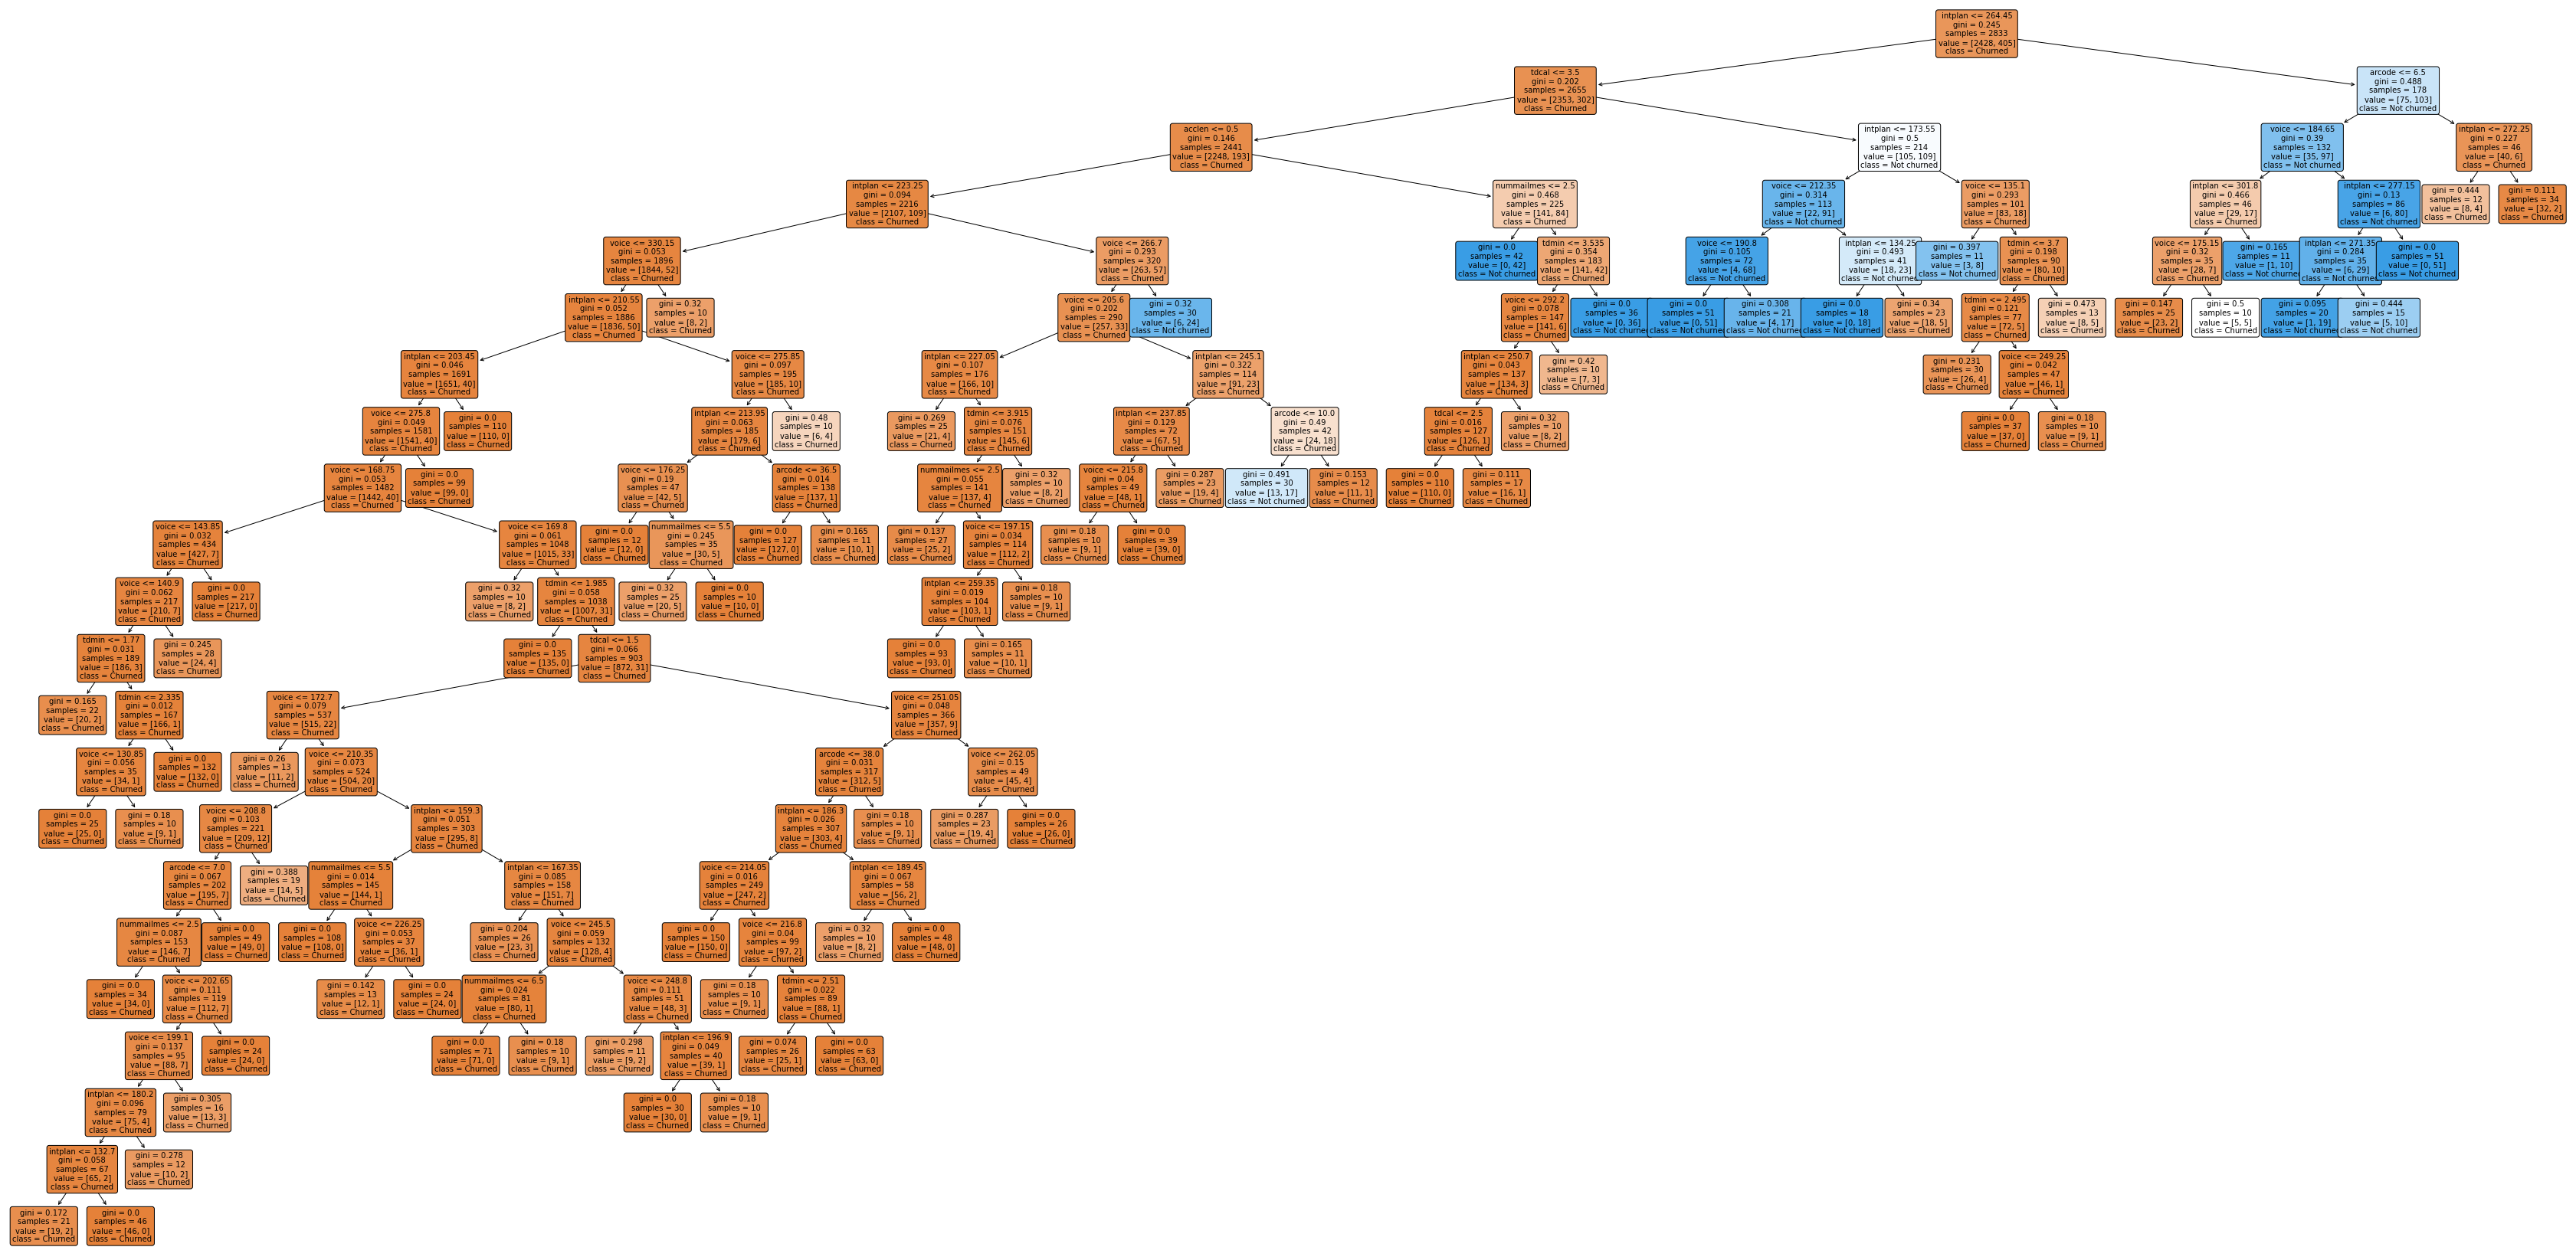

In [194]:
plt.figure(figsize=(60, 30))
tree.plot_tree(model, 
               filled=True, rounded=True, 
               feature_names = Xtrain.columns,
               class_names = ['Churned','Not churned'],
               fontsize=10)
plt.show()

# >>>>>  From RFE we are getting the best result at 'n_features_to_select' = 7, 'min_samples_leaf'=10, 'min_samples_split' = 35 i.e. 0.75 recall score for test data and 0.73 recall score for train data along with 0.87 and 0.86 AUC scre for training and test data respectively.

In [195]:
model=tree.DecisionTreeClassifier(random_state=42)
rfemodel=feature_selection.RFE(estimator=model)
pdict={'n_features_to_select':[2,4,5,6,7,8]}
gridobj=model_selection.GridSearchCV(estimator=rfemodel,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1,return_train_score=True)

In [196]:
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RFE(estimator=DecisionTreeClassifier(random_state=42)),
             n_jobs=-1, param_grid={'n_features_to_select': [2, 4, 5, 6, 7, 8]},
             return_train_score=True, scoring='recall')

In [197]:
gridobj.best_params_

{'n_features_to_select': 7}

In [198]:
bestmodel=gridobj.best_estimator_

In [199]:
Xtrain.columns[bestmodel.support_]

Index(['intplan', 'tdchar', 'tecahr', 'tnmin', 'timin', 'tical', 'ncsc'], dtype='object')

In [200]:
Xtrain3=Xtrain[list(Xtrain.columns[bestmodel.support_])]
Xtest3=Xtest[list(Xtrain.columns[bestmodel.support_])]

In [201]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=10,min_samples_split=35)
model.fit(Xtrain3,ytrain)
trainpred=model.predict(Xtrain3)
testpred=model.predict(Xtest3)

In [202]:
printmetrics(ytrain,trainpred)

AUC :  0.8549
Accuracy :  0.9488
Precision :  0.8988
Recall :  0.7235
F1 :  0.8016


In [203]:
printmetrics(ytest,testpred)

AUC :  0.8291
Accuracy :  0.932
Precision :  0.8548
Recall :  0.6795
F1 :  0.7571


In [204]:
cvresults=pd.DataFrame(gridobj.cv_results_)

In [205]:
cvresults[['params','mean_train_score','mean_test_score']]

params  mean_train_score  mean_test_score
0  {'n_features_to_select': 2}               1.0         0.343210
1  {'n_features_to_select': 4}               1.0         0.385185
2  {'n_features_to_select': 5}               1.0         0.506173
3  {'n_features_to_select': 6}               1.0         0.508642
4  {'n_features_to_select': 7}               1.0         0.570370
5  {'n_features_to_select': 8}               1.0         0.570370

### Here recall score for test data is showing the specific model is overfit

### Here we are again checking RFE with 'min_samples_leaf'=15, 'min_samples_split'=15 as we have got good recall score after taking these specific hyperparameter along with all the columns

In [206]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=15,min_samples_split=15)
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=7)

In [207]:
rfeobj.fit(Xtrain,ytrain)

RFE(estimator=DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=15,
                                     random_state=42),
    n_features_to_select=7)

In [208]:
Xtrain.columns[rfeobj.support_]

Index(['intplan', 'tdmin', 'tdchar', 'temin', 'timin', 'tical', 'ncsc'], dtype='object')

In [209]:
Xtrain2=Xtrain[list(Xtrain.columns[rfeobj.support_])]
Xtest2=Xtest[list(Xtrain.columns[rfeobj.support_])]

In [210]:
model=tree.DecisionTreeClassifier(random_state=42,min_samples_leaf=15,min_samples_split=15)
model.fit(Xtrain2,ytrain)

DecisionTreeClassifier(min_samples_leaf=15, min_samples_split=15,
                       random_state=42)

In [211]:
trainpred=model.predict(Xtrain2)
testpred=model.predict(Xtest2)

In [212]:
printmetrics(ytrain,trainpred)

AUC :  0.8574
Accuracy :  0.9425
Precision :  0.8399
Recall :  0.7383
F1 :  0.7858


In [213]:
printmetrics(ytest,testpred) #here also recall for training and test data are almost similar, but AUC is slightly better in the previous RFE

AUC :  0.8464
Accuracy :  0.926
Precision :  0.7808
Recall :  0.7308
F1 :  0.755


# >>>>> So, after ovserving from several aspects we are getting best result from decision tree with -      'n_features_to_select' = 7 i.e. 0.75 recall score for test data and 0.73 recall score for train data along with 0.87 and 0.86 AUC scre for training and test data respectively with 'min_samples_leaf'=10, 'min_samples_split'=35 using RFE.

# C. Random Forest

In [214]:
from sklearn import ensemble #required for ensemble i.e. random forest here

### Base model

In [215]:
model=ensemble.RandomForestClassifier(random_state=42,n_estimators=50)
model.fit(Xtrain,ytrain)

RandomForestClassifier(n_estimators=50, random_state=42)

In [216]:
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [217]:
printmetrics(ytrain,predtrain)#overfit

AUC :  0.9975
Accuracy :  0.9993
Precision :  1.0
Recall :  0.9951
F1 :  0.9975


In [218]:
printmetrics(ytest,predtest)

AUC :  0.8671
Accuracy :  0.952
Precision :  0.9355
Recall :  0.7436
F1 :  0.8286


## Taking specific no. of features under consideration

In [219]:
model=ensemble.RandomForestClassifier(random_state=42,n_estimators=10,max_features=5) #take any 8 columns randomly 
model.fit(Xtrain,ytrain)

RandomForestClassifier(max_features=5, n_estimators=10, random_state=42)

In [220]:
predtrain=model.predict(Xtrain)
predtest=model.predict(Xtest)

In [221]:
printmetrics(ytrain,predtrain)#overfit

AUC :  0.979
Accuracy :  0.994
Precision :  1.0
Recall :  0.958
F1 :  0.9786


In [222]:
printmetrics(ytest,predtest)

AUC :  0.8875
Accuracy :  0.96
Precision :  0.9531
Recall :  0.7821
F1 :  0.8592


In [223]:
pd.Series(model.feature_importances_,index=Xtrain.columns).sort_values(ascending=False)

tdchar        0.187985
tdmin         0.129231
ncsc          0.112475
intplan       0.095719
temin         0.069926
tecahr        0.063533
tical         0.044728
tnmin         0.043878
timin         0.036377
tichar        0.034003
tnchar        0.030590
tdcal         0.029493
acclen        0.028168
tecal         0.026537
tncal         0.024935
voice         0.018275
nummailmes    0.014440
arcode        0.009707
dtype: float64

In [224]:
model=ensemble.RandomForestClassifier(random_state=42)
pdict={'n_estimators':[10,15,20,25,30]}
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,scoring='recall',cv=5,return_train_score=True)
gridobj.fit(Xtrain,ytrain)
print("Best Params :",gridobj.best_params_)
print("Best Score :",gridobj.best_score_)

Best Params : {'n_estimators': 25}
Best Score : 0.7234567901234568


In [225]:
cvresults=pd.DataFrame(gridobj.cv_results_)

In [226]:
cvresults[['params','mean_train_score','mean_test_score']]

params  mean_train_score  mean_test_score
0  {'n_estimators': 10}          0.944444         0.634568
1  {'n_estimators': 15}          0.981481         0.711111
2  {'n_estimators': 20}          0.970988         0.693827
3  {'n_estimators': 25}          0.990741         0.723457
4  {'n_estimators': 30}          0.985185         0.701235

### Here we are getting recall score of 0.72 taking n_estimators as 25, but recall for training data is 0.99

In [227]:
model=ensemble.RandomForestClassifier(random_state=42)
pdict={'n_estimators':[12,15,16,17,18],'max_features':[2,3,4,5,6]} 
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,scoring='recall',cv=5,return_train_score=True)
gridobj.fit(Xtrain,ytrain)
print("Best Params :",gridobj.best_params_)
print("Best Score :",gridobj.best_score_)

Best Params : {'max_features': 5, 'n_estimators': 15}
Best Score : 0.7283950617283951


In [228]:
cvresults=pd.DataFrame(gridobj.cv_results_)
cvresults[['params','mean_train_score','mean_test_score']]

params  mean_train_score  mean_test_score
0   {'max_features': 2, 'n_estimators': 12}          0.948148         0.434568
1   {'max_features': 2, 'n_estimators': 15}          0.983951         0.533333
2   {'max_features': 2, 'n_estimators': 16}          0.973457         0.486420
3   {'max_features': 2, 'n_estimators': 17}          0.985185         0.525926
4   {'max_features': 2, 'n_estimators': 18}          0.971605         0.476543
5   {'max_features': 3, 'n_estimators': 12}          0.950617         0.590123
6   {'max_features': 3, 'n_estimators': 15}          0.983951         0.639506
7   {'max_features': 3, 'n_estimators': 16}          0.972222         0.609877
8   {'max_features': 3, 'n_estimators': 17}          0.983951         0.651852
9   {'max_features': 3, 'n_estimators': 18}          0.968519         0.619753
10  {'max_features': 4, 'n_estimators': 12}          0.948765         0.651852
11  {'max_features': 4, 'n_estimators': 15}          0.981481         0.711111
12  {'max_features': 4, 'n_estimators': 16}          0.975309         0.674074
13  {'max_features': 4, 'n_estimators': 17}          0.982099         0.708642
14  {'max_features': 4, 'n_estimators': 18}          0.970988         0.681481
15  {'max_features': 5, 'n_estimators': 12}          0.948765         0.693827
16  {'max_features': 5, 'n_estimators': 15}          0.979630         0.728395
17  {'max_features': 5, 'n_estimators': 16}          0.972840         0.693827
18  {'max_features': 5, 'n_estimators': 17}          0.980247         0.720988
19  {'max_features': 5, 'n_estimators': 18}          0.967901         0.703704
20  {'max_features': 6, 'n_estimators': 12}          0.947531         0.696296
21  {'max_features': 6, 'n_estimators': 15}          0.980864         0.711111
22  {'max_features': 6, 'n_estimators': 16}          0.972840         0.696296
23  {'max_features': 6, 'n_estimators': 17}          0.981481         0.720988
24  {'max_features': 6, 'n_estimators': 18}          0.966049         0.703704

In [229]:
model=ensemble.RandomForestClassifier(random_state=42,max_features=5,n_estimators=15)
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=12)
rfeobj.fit(Xtrain,ytrain)

RFE(estimator=RandomForestClassifier(max_features=5, n_estimators=15,
                                     random_state=42),
    n_features_to_select=12)

In [230]:
Xtrain.columns[rfeobj.support_]

Index(['intplan', 'nummailmes', 'tdmin', 'tdcal', 'tdchar', 'temin', 'tecahr',
       'tnmin', 'timin', 'tical', 'tichar', 'ncsc'],
      dtype='object')

In [231]:
model=ensemble.RandomForestClassifier(random_state=42,max_features=5,n_estimators=15)
rfemodel=feature_selection.RFE(estimator=model)
pdict={'n_features_to_select':[5,6,7,8,9,10]}
gridobj=model_selection.GridSearchCV(estimator=rfemodel,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1,return_train_score=True) 
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RFE(estimator=RandomForestClassifier(max_features=5,
                                                            n_estimators=15,
                                                            random_state=42)),
             n_jobs=-1,
             param_grid={'n_features_to_select': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='recall')

In [232]:
print("Best Params :",gridobj.best_params_)
print("Best Score :",gridobj.best_score_)

Best Params : {'n_features_to_select': 10}
Best Score : 0.7456790123456789


In [233]:
cvresults=pd.DataFrame(gridobj.cv_results_)
cvresults[['params','mean_train_score','mean_test_score']]

params  mean_train_score  mean_test_score
0   {'n_features_to_select': 5}          0.961728         0.412346
1   {'n_features_to_select': 6}          0.967901         0.538272
2   {'n_features_to_select': 7}          0.966049         0.523457
3   {'n_features_to_select': 8}          0.962963         0.538272
4   {'n_features_to_select': 9}          0.977778         0.698765
5  {'n_features_to_select': 10}          0.981481         0.745679

### Here we are getting a recall score of 0.75 for test data using random forest model by selecting 10 features and n_estimators as 15 but recall score for training data is almost 0.98 

In [234]:
model=ensemble.RandomForestClassifier(random_state=42)
pdict={'n_estimators':[15,16,17,19,20,25],'max_features':[5,6,7,8,9,10]} 
gridobj=model_selection.GridSearchCV(estimator=model,param_grid=pdict,scoring='recall',cv=5,return_train_score=True)
gridobj.fit(Xtrain,ytrain)
print("Best Params :",gridobj.best_params_)
print("Best Score :",gridobj.best_score_)

Best Params : {'max_features': 9, 'n_estimators': 25}
Best Score : 0.7506172839506172


In [235]:
cvresults=pd.DataFrame(gridobj.cv_results_)
cvresults[['params','mean_train_score','mean_test_score']]

params  mean_train_score  \
0    {'max_features': 5, 'n_estimators': 15}          0.979630   
1    {'max_features': 5, 'n_estimators': 16}          0.972840   
2    {'max_features': 5, 'n_estimators': 17}          0.980247   
3    {'max_features': 5, 'n_estimators': 19}          0.980247   
4    {'max_features': 5, 'n_estimators': 20}          0.969136   
5    {'max_features': 5, 'n_estimators': 25}          0.988272   
6    {'max_features': 6, 'n_estimators': 15}          0.980864   
7    {'max_features': 6, 'n_estimators': 16}          0.972840   
8    {'max_features': 6, 'n_estimators': 17}          0.981481   
9    {'max_features': 6, 'n_estimators': 19}          0.980864   
10   {'max_features': 6, 'n_estimators': 20}          0.969136   
11   {'max_features': 6, 'n_estimators': 25}          0.989506   
12   {'max_features': 7, 'n_estimators': 15}          0.981481   
13   {'max_features': 7, 'n_estimators': 16}          0.972222   
14   {'max_features': 7, 'n_estimators': 17}          0.980864   
15   {'max_features': 7, 'n_estimators': 19}          0.982716   
16   {'max_features': 7, 'n_estimators': 20}          0.970370   
17   {'max_features': 7, 'n_estimators': 25}          0.989506   
18   {'max_features': 8, 'n_estimators': 15}          0.981481   
19   {'max_features': 8, 'n_estimators': 16}          0.973457   
20   {'max_features': 8, 'n_estimators': 17}          0.982099   
21   {'max_features': 8, 'n_estimators': 19}          0.980247   
22   {'max_features': 8, 'n_estimators': 20}          0.969753   
23   {'max_features': 8, 'n_estimators': 25}          0.988272   
24   {'max_features': 9, 'n_estimators': 15}          0.980864   
25   {'max_features': 9, 'n_estimators': 16}          0.970988   
26   {'max_features': 9, 'n_estimators': 17}          0.980247   
27   {'max_features': 9, 'n_estimators': 19}          0.981481   
28   {'max_features': 9, 'n_estimators': 20}          0.967284   
29   {'max_features': 9, 'n_estimators': 25}          0.987654   
30  {'max_features': 10, 'n_estimators': 15}          0.981481   
31  {'max_features': 10, 'n_estimators': 16}          0.970988   
32  {'max_features': 10, 'n_estimators': 17}          0.982716   
33  {'max_features': 10, 'n_estimators': 19}          0.981481   
34  {'max_features': 10, 'n_estimators': 20}          0.970988   
35  {'max_features': 10, 'n_estimators': 25}          0.990123   

    mean_test_score  
0          0.728395  
1          0.693827  
2          0.720988  
3          0.723457  
4          0.701235  
5          0.728395  
6          0.711111  
7          0.696296  
8          0.720988  
9          0.713580  
10         0.696296  
11         0.716049  
12         0.716049  
13         0.698765  
14         0.716049  
15         0.718519  
16         0.698765  
17         0.716049  
18         0.733333  
19         0.718519  
20         0.735802  
21         0.738272  
22         0.730864  
23         0.740741  
24         0.733333  
25         0.716049  
26         0.733333  
27         0.740741  
28         0.723457  
29         0.750617  
30         0.720988  
31         0.708642  
32         0.720988  
33         0.725926  
34         0.706173  
35         0.720988

In [236]:
model=ensemble.RandomForestClassifier(random_state=42,max_features=9,n_estimators=25)
rfeobj=feature_selection.RFE(estimator=model,n_features_to_select=12)
rfeobj.fit(Xtrain,ytrain)

RFE(estimator=RandomForestClassifier(max_features=9, n_estimators=25,
                                     random_state=42),
    n_features_to_select=12)

In [237]:
Xtrain.columns[rfeobj.support_]

Index(['intplan', 'nummailmes', 'tdmin', 'tdchar', 'temin', 'tecahr', 'tnmin',
       'tnchar', 'timin', 'tical', 'tichar', 'ncsc'],
      dtype='object')

In [238]:
model=ensemble.RandomForestClassifier(random_state=42,max_features=9,n_estimators=25)
rfemodel=feature_selection.RFE(estimator=model)
pdict={'n_features_to_select':[6,7,8,9,10,11,12]}
gridobj=model_selection.GridSearchCV(estimator=rfemodel,param_grid=pdict,cv=5,scoring='recall',n_jobs=-1,return_train_score=True) 
gridobj.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=RFE(estimator=RandomForestClassifier(max_features=9,
                                                            n_estimators=25,
                                                            random_state=42)),
             n_jobs=-1,
             param_grid={'n_features_to_select': [6, 7, 8, 9, 10, 11, 12]},
             return_train_score=True, scoring='recall')

In [239]:
print("Best Params :",gridobj.best_params_)
print("Best Score :",gridobj.best_score_)

Best Params : {'n_features_to_select': 11}
Best Score : 0.7407407407407408


In [240]:
cvresults=pd.DataFrame(gridobj.cv_results_)
cvresults[['params','mean_train_score','mean_test_score']]

params  mean_train_score  mean_test_score
0   {'n_features_to_select': 6}               NaN              NaN
1   {'n_features_to_select': 7}               NaN              NaN
2   {'n_features_to_select': 8}               NaN              NaN
3   {'n_features_to_select': 9}          0.985802         0.641975
4  {'n_features_to_select': 10}          0.988272         0.738272
5  {'n_features_to_select': 11}          0.987654         0.740741
6  {'n_features_to_select': 12}          0.988889         0.735802

### Here also we are getting a good recall score of 0.74 for test data but recall for train data is almost 0.98

# EDA(Exploretory Data Analysis)

### Here we will analyse - 'intplan', 'nummailmes', 'tdmin', 'temin', 'tical', 'tichar', 'ncsc', as these are the selected columns/features of the best model'

### 1.Analysing 'intplan' 

In [241]:
df['intplan'].value_counts()/df.shape[0]

no     0.90309
yes    0.09691
Name: intplan, dtype: float64

<AxesSubplot:xlabel='count', ylabel='intplan'>

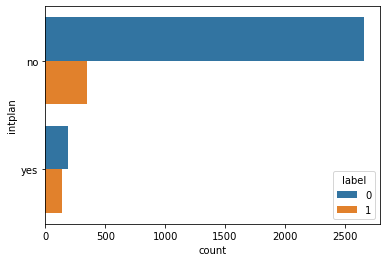

In [242]:
sns.countplot(y='intplan',hue='label',data=df)

In [243]:
pd.crosstab(index=df['intplan'],columns=df['label'],normalize='index')

label           0         1
intplan                    
no       0.885050  0.114950
yes      0.575851  0.424149

### From here we can easily visualize that customers with internet plan are being churned at a high rate(42%), so customer with internet plan should be provided several offers to retain those existing customers

### 2.Analysing 'nummailmes'

In [244]:
df['nummailmes'].value_counts()/df.shape[0]

0     0.723372
31    0.018002
29    0.015902
28    0.015302
33    0.013801
30    0.013201
27    0.013201
24    0.012601
26    0.012301
32    0.012301
25    0.011101
23    0.010801
36    0.010201
22    0.009601
35    0.009601
39    0.009001
37    0.008701
34    0.008701
21    0.008401
38    0.007501
20    0.006601
19    0.005701
40    0.004800
42    0.004500
17    0.004200
41    0.003900
16    0.003900
43    0.002700
15    0.002700
14    0.002100
44    0.002100
18    0.002100
12    0.001800
45    0.001800
13    0.001200
46    0.001200
47    0.000900
50    0.000600
11    0.000600
9     0.000600
48    0.000600
8     0.000600
4     0.000300
10    0.000300
49    0.000300
51    0.000300
Name: nummailmes, dtype: float64

### Here we can see that most of the customers(>72%) are not getting any mail message, so it contains huge no. of outliers

In [245]:
df['nummailmes'].describe()

count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: nummailmes, dtype: float64

<AxesSubplot:ylabel='nummailmes'>

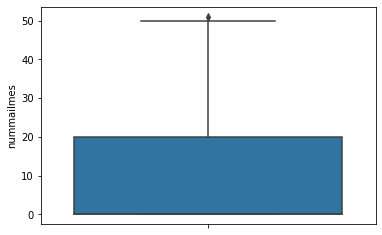

In [246]:
sns.boxplot(y='nummailmes',data=df)

<AxesSubplot:xlabel='nummailmes', ylabel='Density'>

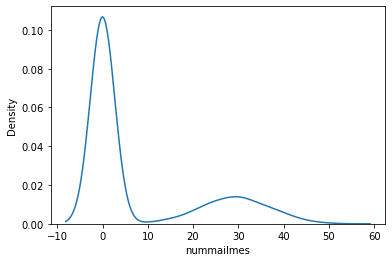

In [247]:
sns.distplot(df['nummailmes'],hist=False) 

<AxesSubplot:xlabel='intplan', ylabel='nummailmes'>

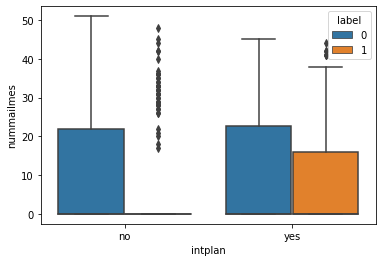

In [248]:
sns.boxplot(y='nummailmes',x='intplan',hue='label',data=df)

### Here we can see an important thing that customer without internet plan with mail messages 0-20 are not going to be churned at all. Most of the customers without internet plan and with more than 20 mail messages are being churned. Some of the customers with internet plan with very high no. of mail messages (>40) and less no. of mail messages (<15) are being churned. 

### 3.Analysing 'tdmin'

In [249]:
df['tdmin'].describe() #here we can see that mean and median are almost equal, no outlier is there 

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: tdmin, dtype: float64

<AxesSubplot:xlabel='tdmin', ylabel='Density'>

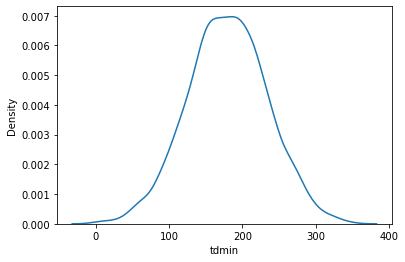

In [250]:
sns.distplot(df['tdmin'],hist=False)

<AxesSubplot:xlabel='intplan', ylabel='tdmin'>

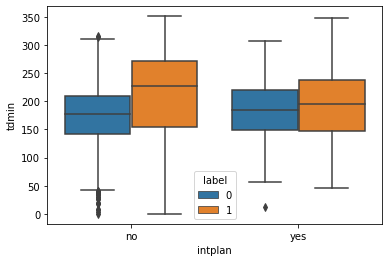

In [251]:
sns.boxplot(y='tdmin',x='intplan',hue='label',data=df)

### Here we can see that customers without internet plan and with more than 200 total day messages are churned. We can't differentiate between the customers being churned  and not churned w.r.t. 'tdmin' who have internet plan.

### 4.Analysing 'temin'

In [252]:
df['temin'].describe() #here also we can see that mean and median are almost equal, no outlier in 'temin' 

count    3333.000000
mean      200.980348
std        50.713844
min         0.000000
25%       166.600000
50%       201.400000
75%       235.300000
max       363.700000
Name: temin, dtype: float64

<AxesSubplot:xlabel='temin', ylabel='Density'>

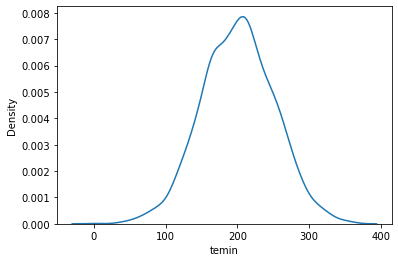

In [253]:
sns.distplot(df['temin'],hist=False) #it is also quite symmetric

<AxesSubplot:xlabel='intplan', ylabel='temin'>

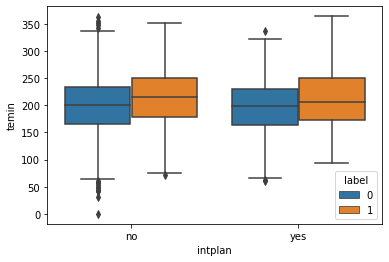

In [254]:
sns.boxplot(y='temin',x='intplan',hue='label',data=df)

### We can not differentiate between churned and not churned w.r.t. total evening time minutes.

### 5.Analysing 'tical'

In [255]:
df['tical'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: tical, dtype: float64

<AxesSubplot:xlabel='intplan', ylabel='tical'>

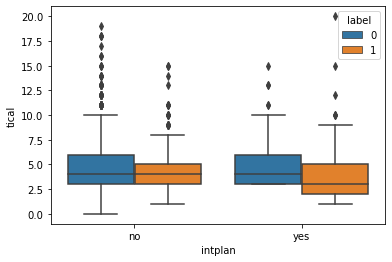

In [256]:
sns.boxplot(y='tical',x='intplan',hue='label',data=df)

### 6.Analysing 'tichar'

In [257]:
df['tichar'].describe() #very few outliers

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: tichar, dtype: float64

<AxesSubplot:xlabel='intplan', ylabel='tichar'>

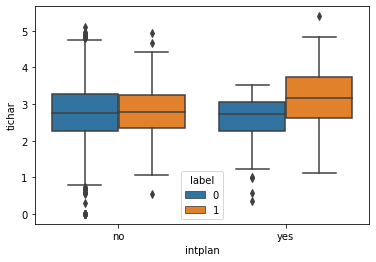

In [258]:
sns.boxplot(y='tichar',x='intplan',hue='label',data=df)

### Here we can observe that customers with internet plan and total international charges >3 are being churned

### 7.Analysing 'ncsc'

In [259]:
df['ncsc'].describe()

count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: ncsc, dtype: float64

<AxesSubplot:xlabel='intplan', ylabel='ncsc'>

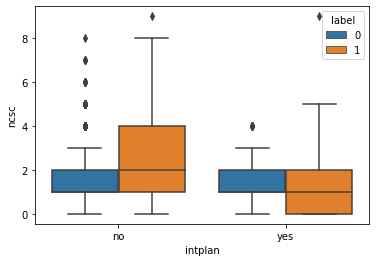

In [260]:
sns.boxplot(y='ncsc',x='intplan',hue='label',data=df)

### Here we can see that customers having internet plan with very less (<2) no. of customer services calls are being churned. The customers without internet plan and with (>2) no. of customer services calls are being churned. We can also see that customers without internet plan and with very (>4) no. of customer services calls are not being churned.                                                                                                                                                           So we need to provide the customers with internet plan several offers and increase no. of customer services calls as, most of the customers having internet plan are being churned which we have already observed.